# Exploring and Analyzing OpenFoodFacts Data

Taken from https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip
Data fields : https://world.openfoodfacts.org/data/data-fields.txt

## 1) Clean and filter features and products

### Opening CSV file

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir()
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Project_3")
print(f'Working directory: {os.getcwd()}')

Mounted at /content/drive
Working directory: /content/drive/MyDrive/Colab_Notebooks/Project_3


In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.7f}'.format) # don't want scientific notation. Floats are enough
pd.set_option('display.max_colwidth', None)

csv_path = "./fr.openfoodfacts.org.products.csv"
df = pd.read_csv(csv_path, na_values=[''], sep='\t')

<ipython-input-2-95ad0a3d505a>:6: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, na_values=[''], sep='\t')


### Naive Analysis

#### Use pandas basic methods

In [3]:
import sys
print('Size in MB:')
sys.getsizeof(df)/(10**6)

Size in MB:


1823.539508

In [4]:
print(", ".join(df.columns.tolist())) # display columns names

code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, ene

In [5]:
df.info() # display count of columns, lines and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
df.head(2) # display 2 first lines

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0000000,14.0000000,NaN,NaN


In [7]:
df.describe()# general statistics only on number types variables (int and floats)

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0000000,248939.0000000,248939.0000000,0.0000000,248939.0000000,0.0000000,0.0000000,261113.0000000,857.0000000,243891.0000000,...,49.0000000,3036.0000000,165.0000000,948.0000000,0.0000000,268.0000000,221210.0000000,221210.0000000,0.0000000,0.0000000
mean,NaN,1.9360245,0.0196594,NaN,0.0552465,NaN,NaN,1141.9146048,585.5012135,12.7303786,...,6.4256980,31.4585870,15.4121212,49.5477848,NaN,341.7007638,9.1655350,9.0580489,NaN,NaN
std,NaN,2.5020195,0.1405241,NaN,0.2692074,NaN,NaN,6447.1540934,712.8099434,17.5787467,...,2.0478414,31.9679182,3.7530278,18.7579324,NaN,425.2114390,9.0559029,9.1835893,NaN,NaN
min,NaN,0.0000000,0.0000000,NaN,0.0000000,NaN,NaN,0.0000000,0.0000000,0.0000000,...,0.0000000,0.0000000,8.0000000,6.0000000,NaN,0.0000000,-15.0000000,-15.0000000,NaN,NaN
25%,NaN,0.0000000,0.0000000,NaN,0.0000000,NaN,NaN,377.0000000,49.4000000,0.0000000,...,6.3000000,0.0000000,12.0000000,32.0000000,NaN,98.7500000,1.0000000,1.0000000,NaN,NaN
50%,NaN,1.0000000,0.0000000,NaN,0.0000000,NaN,NaN,1100.0000000,300.0000000,5.0000000,...,7.2000000,23.0000000,15.0000000,50.0000000,NaN,195.7500000,10.0000000,9.0000000,NaN,NaN
75%,NaN,3.0000000,0.0000000,NaN,0.0000000,NaN,NaN,1674.0000000,898.0000000,20.0000000,...,7.4000000,51.0000000,15.0000000,64.2500000,NaN,383.2000000,16.0000000,16.0000000,NaN,NaN
max,NaN,31.0000000,2.0000000,NaN,6.0000000,NaN,NaN,3251373.0000000,3830.0000000,714.2900000,...,8.4000000,100.0000000,25.0000000,100.0000000,NaN,2842.0000000,40.0000000,40.0000000,NaN,NaN


#### Global Univariate analysis

In [8]:
!pip install pingouin
from data_analysis_functions import plot_univariate_variable_analysis, plot_bivariate_variable_analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


In [9]:
!pip install deep-translator
!pip install googletrans

from strings_management import translate_word, translate_all_words_batch
# create a 'categories_tags_en' column. For each value of "categories_tags" inside of the df_refined dataframe each value is a list coma separated. I want to keep only the elements that are starting with "en" and then remake the coma separated string. Remove "en:" each time

def process_tags_with_language_indicator(tags_str):
  """
  Processes a comma-separated string of categories tags.

  Keeps only the elements starting with "en", removes "en:", and
  reconstructs the comma-separated string.
  If no "en" term is found, try translating the others.

  Args:
    categories_tags_str: A string of comma-separated categories tags.

  Returns:
    A string of comma-separated categories tags starting with "en"
    with "en:" removed, or an np.nan if no such tags are found or can be translated.
  """
  if pd.isna(tags_str) or tags_str == '' or tags_str is None:
    return np.nan
  tags = tags_str.split(',')
  en_tags = [tag[3:] for tag in tags if tag.startswith('en:')]
  if not en_tags:
    if not tags_str.startswith('other') and tags_str[2] == ':':
      en_tags = translate_all_words_batch(
          tags_str.replace(tags_str[0:3],'').split(','), source_language=tags_str[0:2]
          ).values()
    elif tags_str.startswith('other'):
      en_tags = translate_all_words_batch(
          tags_str.replace(tags_str[0:len('other')],'').split(','), source_language='auto'
          ).values()
    else:
      en_tags = translate_word(
          tags_str, source_language='auto',
          )['translated'].split(',')
    # if translation fails (can be because of bad language indicator) --> try auto with maximum words
    if None in en_tags:
      en_tags = translate_word(
          tags_str.replace(tags_str[0:3],''),
          )['translated'].split(',')
  if en_tags is not None and None not in en_tags:
    return ','.join(list(en_tags))
  else :
    return np.nan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.0 MB/s eta 0:00:00


In [10]:
df['countries_tags']

,countries_tags
0,en:france
1,en:united-states
2,en:united-states
3,en:united-states
4,en:united-states
...,...
320767,en:romania
320768,en:united-states
320769,en:china
320770,en:france


In [11]:
import numpy as np

In [12]:
# Create the 'categories_tags_en' column
df['countries_tags_en'] = df['countries_tags'].apply(process_tags_with_language_indicator)

In [13]:
df['countries_tags_en'].nunique()

686

In [14]:
df['countries_tags'].nunique()

725

In [15]:
# create lists
df['countries_tags_en'] = df['countries_tags_en'].astype('string').apply(
    lambda x: list(set(x.lower().split(','))) if not pd.isna(x) else [])

In [16]:
df['countries_tags_en']

,countries_tags_en
0,[france]
1,[united-states]
2,[united-states]
3,[united-states]
4,[united-states]
...,...
320767,[romania]
320768,[united-states]
320769,[china]
320770,[france]


In [17]:
df['countries_tags_en'].explode().unique()

array(['france', 'united-states', 'united-kingdom', 'canada',
       'switzerland', 'spain', 'germany', 'slovenia', 'italy', 'romania',
       'australia', 'portugal', 'netherlands', 'belgium', 'guadeloupe',
       nan, 'etats-unis', 'ireland', 'reunion', 'taiwan', 'brazil',
       'dominican-republic', 'australie', 'saudi-arabia',
       'united-arab-emirates', 'iraq', 'kuwait', 'moldova',
       'new-caledonia', 'singapore', 'finland', 'thailand', 'new-zealand',
       'french-polynesia', 'panama', 'costa-rica', 'mexico', 'pays-bas',
       'scotland', 'china', 'luxembourg', 'lebanon', 'deutschland',
       'denmark', 'spanien', 'nederland', 'belgie', 'malaysia', 'guyana',
       'serbia', 'martinique', 'barbados', 'aruba', 'hong-kong', 'norway',
       'haiti', 'el-salvador', 'bahrain', 'morocco', 'oman',
       'south-korea', 'trinidad-and-tobago', 'niederlande', 'chile',
       'cuba', 'philippines', 'united-states-of-america', 'austria',
       'sweden', 'guinea', 'israel', 'russ

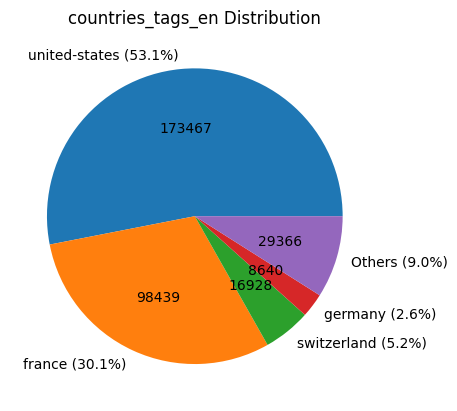

In [18]:
plot_univariate_variable_analysis(df.explode('countries_tags_en'),'countries_tags_en','pie')

In [19]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

### Sort features (quantitative or categorical)

In [20]:
features_by_type = {}
for feature in df.columns :
  try:
    df[feature].astype('float64')
    features_by_type[feature] = 'quantitative'
  except ValueError:
    features_by_type[feature] = 'categorical'

In [21]:
features_by_type

{'code': 'quantitative',
 'url': 'categorical',
 'creator': 'categorical',
 'created_t': 'categorical',
 'created_datetime': 'categorical',
 'last_modified_t': 'categorical',
 'last_modified_datetime': 'categorical',
 'product_name': 'categorical',
 'generic_name': 'categorical',
 'quantity': 'categorical',
 'packaging': 'categorical',
 'packaging_tags': 'categorical',
 'brands': 'categorical',
 'brands_tags': 'categorical',
 'categories': 'categorical',
 'categories_tags': 'categorical',
 'categories_fr': 'categorical',
 'origins': 'categorical',
 'origins_tags': 'categorical',
 'manufacturing_places': 'categorical',
 'manufacturing_places_tags': 'categorical',
 'labels': 'categorical',
 'labels_tags': 'categorical',
 'labels_fr': 'categorical',
 'emb_codes': 'categorical',
 'emb_codes_tags': 'categorical',
 'first_packaging_code_geo': 'categorical',
 'cities': 'categorical',
 'cities_tags': 'categorical',
 'purchase_places': 'categorical',
 'stores': 'categorical',
 'countries': 'cat

### Identify missing values per features

In [22]:
import numpy as np

In [23]:
column_nb_of_nans = df.isna().sum()

In [24]:
print("Taux de remplissage :")
print(1 - (column_nb_of_nans/len(df)))

Taux de remplissage :
code                      0.9999283
url                       0.9999283
creator                   0.9999938
created_t                 0.9999906
created_datetime          0.9999719
                             ...   
nutrition-score-fr_100g   0.6896175
nutrition-score-uk_100g   0.6896175
glycemic-index_100g       0.0000000
water-hardness_100g       0.0000000
countries_tags_en         1.0000000
Length: 163, dtype: float64


#### > 50% NaN values, categorical feature (we will chose one target here)

In [25]:
# dataframe with number of nans per column only when 50% nan or more
where_nans_more_50_percent = np.where(column_nb_of_nans > (len(df)/2))[0]
columns_with_more_50_percent_nans_df = column_nb_of_nans.iloc[where_nans_more_50_percent]

print('Percentage of missing values for each variable that contains minimum 1 nan:')
columns_with_more_50_percent_nans_df/len(df)

print("\n".join(columns_with_more_50_percent_nans_df.index.tolist())) # display columns names

Percentage of missing values for each variable that contains minimum 1 nan:
generic_name
quantity
packaging
packaging_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
allergens
allergens_fr
traces
traces_tags
traces_fr
no_nutriments
additives_tags
additives_fr
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
pnns_groups_1
pnns_groups_2
main_category
main_category_fr
image_url
image_small_url
energy-from-fat_100g
butyric-acid_100g
caproic-acid_100g
caprylic-acid_100g
capric-acid_100g
lauric-acid_100g
myristic-acid_100g
palmitic-acid_100g
stearic-acid_100g
arachidic-acid_100g
behenic-acid_100g
lignoceric-acid_100g
cerotic-acid_100g
montanic-acid_100g
melissic-acid_100g
monounsaturated-fat_100g
polyu

In [26]:
missing_values_features_selection = ['generic_name', 'quantity', 'packaging_tags', 'categories_tags', 'origins_tags', 'manufacturing_places_tags', 'labels_tags', 'emb_codes_tags',
                                      'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'traces_tags', 'additives_tags', 'pnns_groups_1', 'pnns_groups_2']

Text(0.5, 1.0, 'Data counts for each feature')

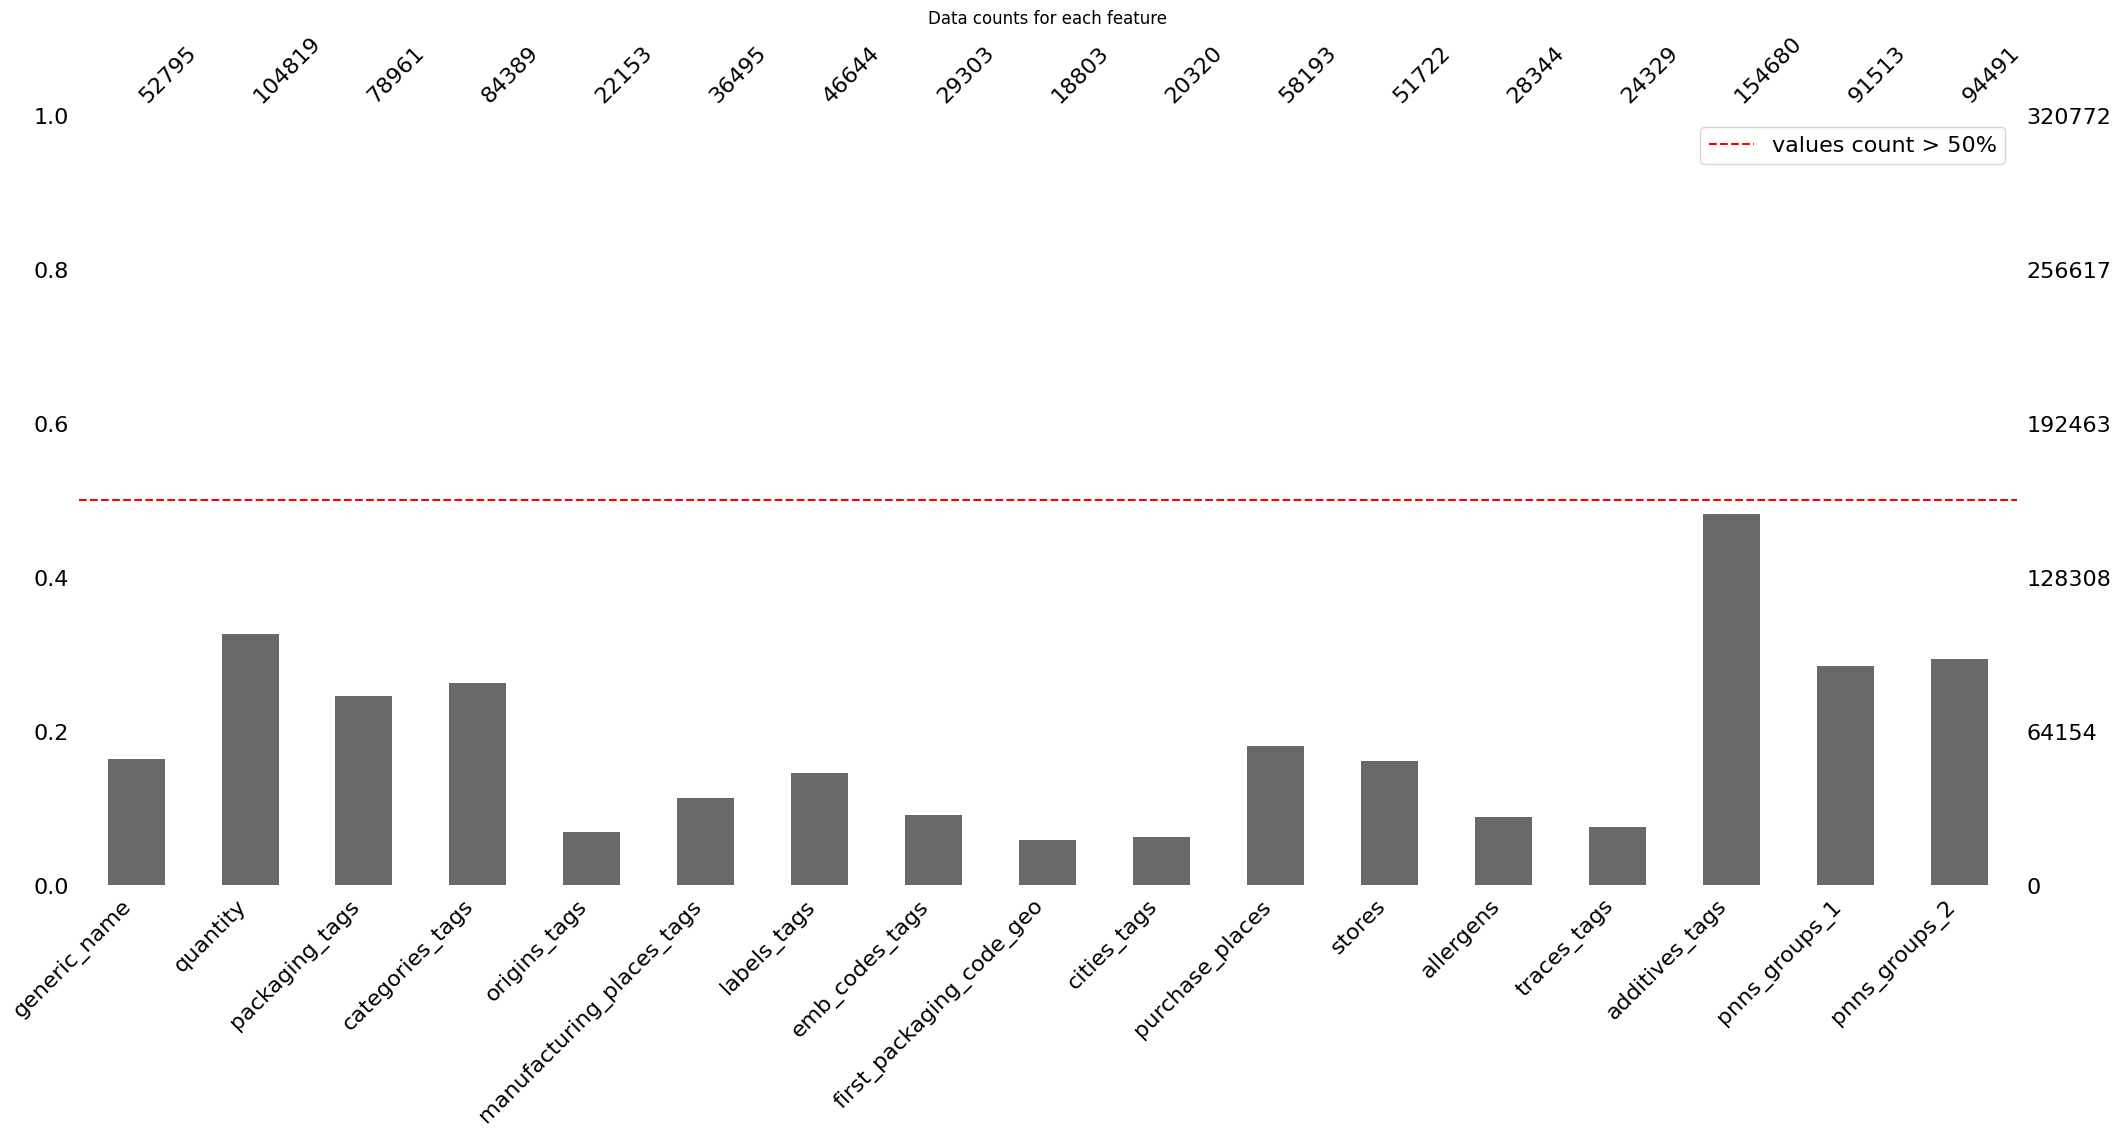

In [27]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df[missing_values_features_selection])
# Add a horizontal line at 50%
plt.axhline(0.5, color='red', linestyle='--', label='values count > 50%')
plt.legend(fontsize=16)
plt.title(f"Data counts for each feature")

In [28]:
# in columns_with_more_50_percent_nans_df, only keep categorical variables
categorical_features = []
for feature in columns_with_more_50_percent_nans_df.index:
  if features_by_type[feature] == 'categorical':
    categorical_features.append(feature)
print(categorical_features)

columns_with_more_50_percent_nans_df = columns_with_more_50_percent_nans_df[
    np.isin(columns_with_more_50_percent_nans_df.index.to_list(), categorical_features)]
print(columns_with_more_50_percent_nans_df.index.tolist())

['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']
['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'trac

In [29]:
columns_with_more_50_percent_nans_df/len(df)

,0
generic_name,0.8354127
quantity,0.6732290
packaging,0.7538439
packaging_tags,0.7538407
categories,0.7368536
categories_tags,0.7369191
categories_fr,0.7368505
origins,0.9308231
origins_tags,0.9309385
manufacturing_places,0.8862089


In [30]:
studied_target = "allergens"

In [31]:
print(f'''Target is "{studied_target}" : {columns_with_more_50_percent_nans_df['allergens']} missing values ({columns_with_more_50_percent_nans_df['allergens']/len(df):.2%})''')

Target is "allergens" : 292428 missing values (91.16%)


In [32]:
df_target_feature_only = df.copy()

In [33]:
# Drop rows where studied target is NaN
df_target_feature_only = df_target_feature_only.dropna(subset=[studied_target])

In [34]:
df_target_feature_only = df_target_feature_only[~df_target_feature_only[studied_target].apply(lambda x: str(x).isspace())]

In [35]:
print(f'Nombre de lignes pour "{studied_target}": {len(df_target_feature_only)}/{len(df)}')

Nombre de lignes pour "allergens": 28342/320772


#### < 50% NaN values other features + selection

In [36]:
column_nb_of_nans_refined = df_target_feature_only.isna().sum()

In [37]:
print(f'''Taux de remplissage des autres variables :\n{1 - (column_nb_of_nans_refined/len(df_target_feature_only))}''')

Taux de remplissage des autres variables :
code                      0.9993296
url                       0.9993296
creator                   1.0000000
created_t                 0.9999647
created_datetime          0.9997883
                             ...   
nutrition-score-fr_100g   0.8571731
nutrition-score-uk_100g   0.8571731
glycemic-index_100g       0.0000000
water-hardness_100g       0.0000000
countries_tags_en         1.0000000
Length: 163, dtype: float64


In [38]:
# dataframe with number of nans per column only when 50% nan or more
where_nans_less_50_percent = np.where(column_nb_of_nans_refined < (len(df_target_feature_only)/2))[0]
columns_with_less_50_percent_nans_df = column_nb_of_nans_refined.iloc[where_nans_less_50_percent]

print('Percentage of missing values for each variable that contains minimum 1 nan:')
print(columns_with_less_50_percent_nans_df/len(df_target_feature_only))

Percentage of missing values for each variable that contains minimum 1 nan:
code                                      0.0006704
url                                       0.0006704
creator                                   0.0000000
created_t                                 0.0000353
created_datetime                          0.0002117
last_modified_t                           0.0000000
last_modified_datetime                    0.0000000
product_name                              0.0040576
generic_name                              0.3132101
quantity                                  0.0173947
packaging                                 0.0367299
packaging_tags                            0.0366947
brands                                    0.0088914
brands_tags                               0.0088914
categories                                0.0255451
categories_tags                           0.0262155
categories_fr                             0.0255451
manufacturing_places                    

In [39]:
studied_features = ['categories_tags','brands_tags', 'countries_tags', 'ingredients_text','additives',
                    'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'energy_100g', 'fat_100g',
                    'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
                    'salt_100g', 'sodium_100g']

#### Remove duplicates

In [40]:
from pandas_df_management import remove_duplicates

In [41]:
# noter ce que la fonction fait précisément
features_for_duplicates = ['code','product_name']
df_target_feature_only_free_duplicates, removed_values_per_feature = remove_duplicates(df_target_feature_only, features_for_duplicates, studied_features)

print(f'Before : {len(df_target_feature_only)}')
print(f'After : {len(df_target_feature_only_free_duplicates)}')
print(f'Removed values per feature duplicates cleaning : {removed_values_per_feature}')

Before : 28342
After : 24850
Removed values per feature duplicates cleaning : {'code': 21, 'product_name': 3471}


#### Missing values per selected feature

In [42]:
df_target_feature_only_free_duplicates[studied_features].isna().sum() / len(df_target_feature_only_free_duplicates)

,0
categories_tags,0.0229779
brands_tags,0.0051107
countries_tags,0.0007646
ingredients_text,0.0000000
additives,0.0000000
ingredients_from_palm_oil_n,0.0000000
nutrition_grade_fr,0.1391147
energy_100g,0.1048290
fat_100g,0.1070423
saturated-fat_100g,0.1232596


Text(0.5, 1.0, 'Data counts for each feature')

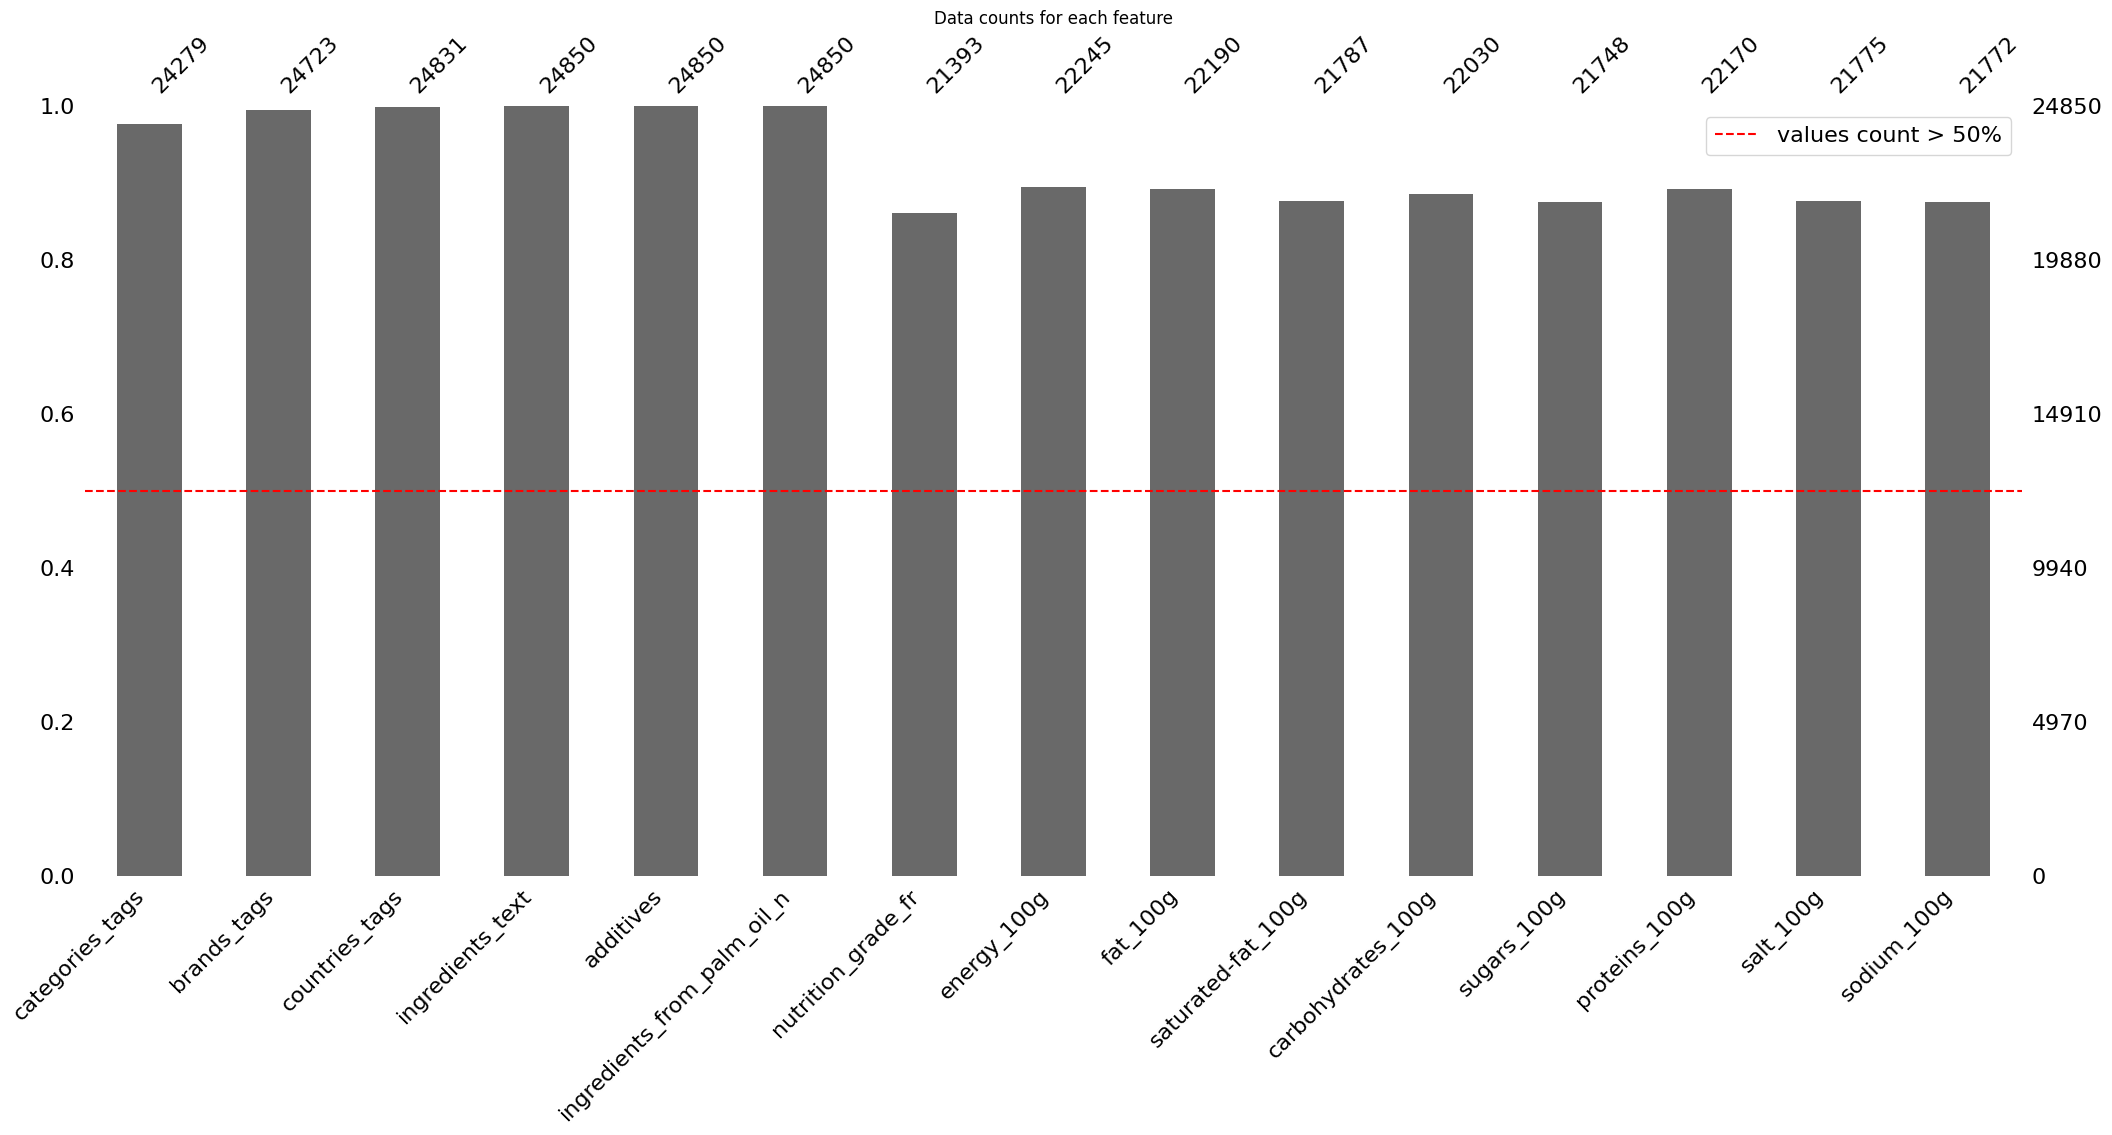

In [43]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df_target_feature_only_free_duplicates[studied_features])
# Add a horizontal line at 50%
plt.axhline(0.5, color='red', linestyle='--', label='values count > 50%')
plt.legend(fontsize=16)
plt.title(f"Data counts for each feature")

## 2) Variables Cleaning and Missing Values Management

### 2.0) General information

In [44]:
df_refined = df_target_feature_only_free_duplicates.copy()

In [45]:
!pip install pingouin
from data_analysis_functions import plot_univariate_variable_analysis, plot_bivariate_variable_analysis

In [46]:
studied_features

['categories_tags',
 'brands_tags',
 'countries_tags',
 'ingredients_text',
 'additives',
 'ingredients_from_palm_oil_n',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [47]:
df_target_feature_only_free_duplicates[studied_features].isna().sum()

,0
categories_tags,571
brands_tags,127
countries_tags,19
ingredients_text,0
additives,0
ingredients_from_palm_oil_n,0
nutrition_grade_fr,3457
energy_100g,2605
fat_100g,2660
saturated-fat_100g,3063


Some new derivated features will be created (mainly from categorical features to quantitative features).
Each new created feature will be added in a dict following this method:
- Based on graph type :
  - added_features_graph_types if new feature is not list based
  - added_containing_lists if new feature is list based
- features_by_type will be updated with the type of variable : quantitative, categorical

In [48]:
added_features_graphs_types = {}

In [49]:
# these ones will need to be exploded when managing analysis
added_containing_lists_features_graphs_types = {}

### 2.1) Quantitative Variables Management

In [50]:
quantitative_features = [feature for feature in studied_features if features_by_type[feature] == 'quantitative']

#### Initial Distribution

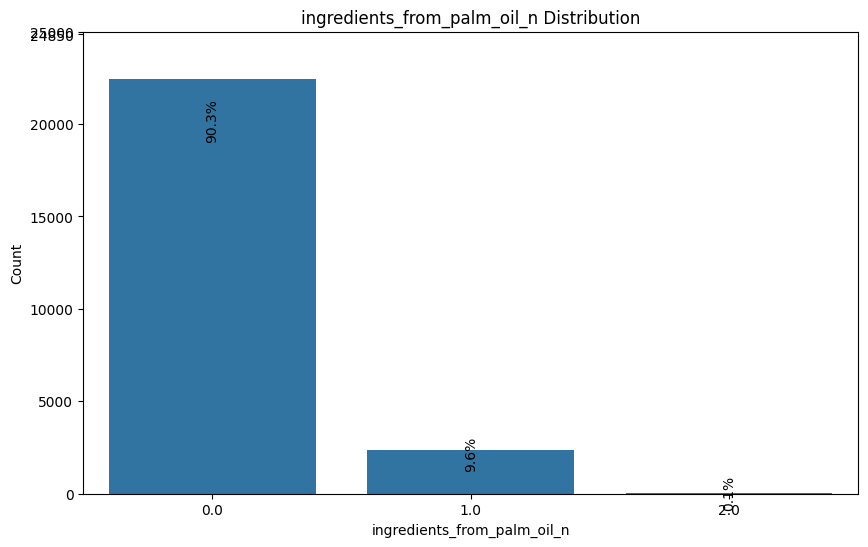

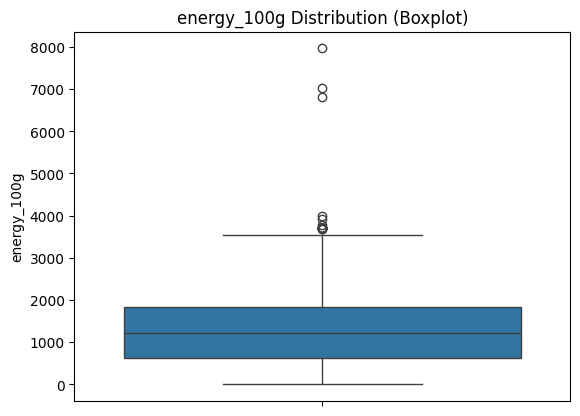

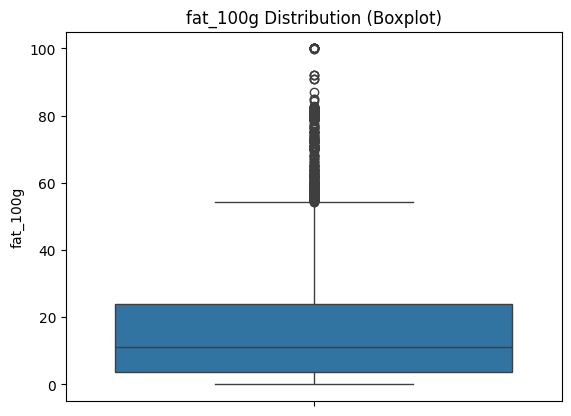

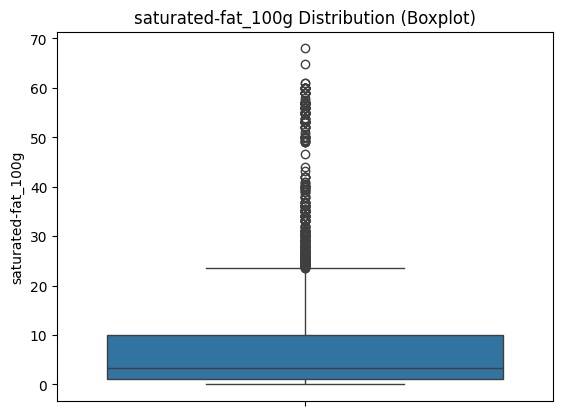

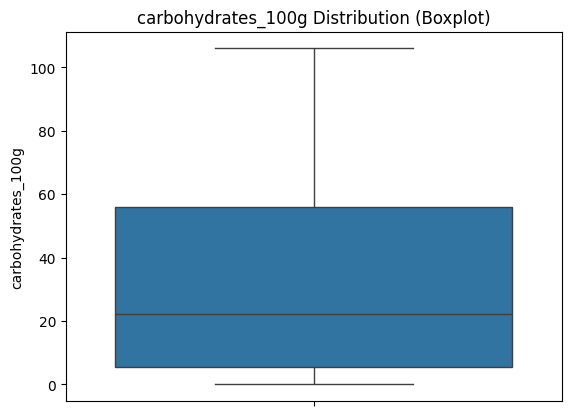

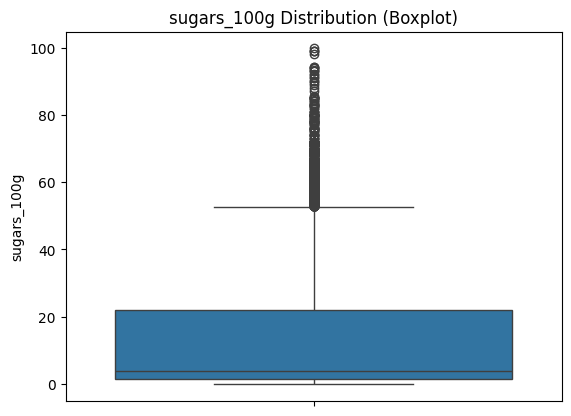

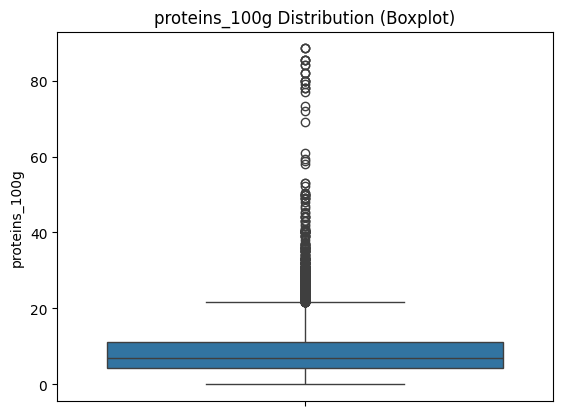

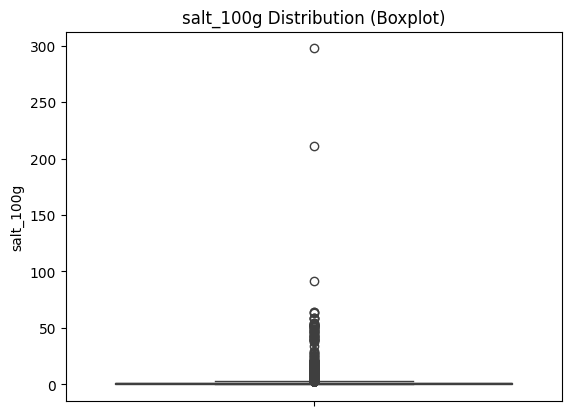

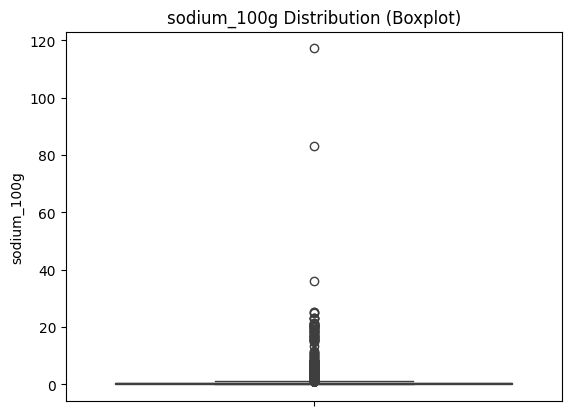

In [51]:
for variable in quantitative_features :
  if '100g' in variable:
    plot_univariate_variable_analysis(df_refined, variable, 'boxplot')
  else:
    plot_univariate_variable_analysis(df_refined, variable, 'bars')

#### All _100g variables outliers cleaning except energy

In [52]:
variables_100g_and_thresholds = {'fat_100g':100, 'saturated-fat_100g':100, 'carbohydrates_100g':105, 'sugars_100g':105,
                            'proteins_100g':100, 'salt_100g':100, 'sodium_100g':100}

In [53]:
# for each variable, check each line of the dataset : if the value for this line exceeds threshold (and is positive), then

modified_lines_100g_nutrients = {key:0 for key in variables_100g_and_thresholds.keys()}
for index, row in df_refined.iterrows():
  for key, value in variables_100g_and_thresholds.items():
      if not pd.isna(row[key]) and (row[key] > value or row[key] < 0):
        df_refined.loc[index, key] = np.nan
        modified_lines_100g_nutrients[key] += 1

In [54]:
added_nan_values = 0
for value in modified_lines_100g_nutrients.values():
  added_nan_values += value

print(f'Number of added NaN values : {added_nan_values}')
print(f'Number values modified to NaN : {modified_lines_100g_nutrients}')

Number of added NaN values : 5
Number values modified to NaN : {'fat_100g': 0, 'saturated-fat_100g': 0, 'carbohydrates_100g': 1, 'sugars_100g': 1, 'proteins_100g': 0, 'salt_100g': 2, 'sodium_100g': 1}


#### energy_100g cleaning and estimations

In [55]:
def quantity_in_g_or_ml_converter(quantity_str): # approximation : 1 ml = 1 g
  quantity_str = quantity_str.replace(' ','').replace('x','*').lower()
  if 'g' in quantity_str and 'ml' in quantity_str: # handle cases with both g and ml : always chose g
    if  quantity_str.index('g') < quantity_str.index('ml'):
      quantity_str = quantity_str[:quantity_str.index('ml')]
    else:
      quantity_str = quantity_str[quantity_str.index('ml'):]
  if '(' in quantity_str and ')' in quantity_str:
    quantity_str = quantity_str[:quantity_str.find('(')] + quantity_str[quantity_str.find(')')+1:]
  if 'oz' in quantity_str: # oz to ml (g) conversion
    quantity_str = quantity_str.replace('oz','') + '*29.5735'
  if 'cl' in quantity_str: # cl to ml (g) conversion
    quantity_str = quantity_str.replace('cl','') + '*10'
  if 'l' in quantity_str: # L to ml (g) conversion
    quantity_str = quantity_str.replace('l','') + '*1000'
  for char in quantity_str:
    if char.isalpha():
      quantity_str = quantity_str.replace(char,'')

  try:
    # Attempt to evaluate the expression
    return eval(quantity_str)
  except (SyntaxError, TypeError):
    # Handle cases where eval fails due to invalid syntax or TypeError
    # For example, if the string is empty or contains invalid characters
    return None # or any other suitable default value


In [56]:
# 3 cases:
## 1: fat_100g, carbohydrates_100g and proteins_100g are available : estimation
## 2 : one of the aboves is missing : check if quantity is available and if that quantity > 100, then divide energy by this quantity, then multiply by 100.
### 2.1 if converted energy is still too high --> np.nan
### 2.2 else, assign it
## 3 if none of the aboves are missing : susbet.loc[index,'quantity'] = np.nan

# values based on https://www.fao.org/4/Y5022E/y5022e04.htm
energy_in_kJ_per_macronutrient = {'fat_100g':38, 'carbohydrates_100g':17, 'proteins_100g':17}

# based on food energy density : https://spark.iop.org/energy-density-foods
max_energy_100g = 100 * energy_in_kJ_per_macronutrient['fat_100g'] # in kJ, fat has highest energy density

modified_lines_100g_energy = {key:0 for key in ['estimation_with_macronutrients', 'quantity conversion', 'incorrect values (NaN)', 'incorrect macronutrients (total > 100 g) (NaN)']}

subset = df_refined[(df_refined['energy_100g'] > max_energy_100g) | (df_refined['energy_100g'].isna())]

for index in subset.index:
  if not pd.isna(subset.loc[index, 'fat_100g']) and not pd.isna(subset.loc[index, 'carbohydrates_100g']) and not pd.isna(subset.loc[index, 'proteins_100g']):
    # Case 1: Estimation (Implementation of estimation method needed here)
    # print(f"Case 1: Index {index} - All macro nutrients available, estimation needed.")
    # Add your estimation logic here
    estimated_energy = 0
    for macronutrient, value in energy_in_kJ_per_macronutrient.items():
      estimated_energy += subset.loc[index, macronutrient] * value
    if not pd.isna(estimated_energy) and estimated_energy <= max_energy_100g:
      df_refined.loc[index, 'energy_100g'] = estimated_energy
      modified_lines_100g_energy['estimation_with_macronutrients'] += 1
    else:
      # print(f"Case 4: Index {index} - Macro nutrients cumulated weight exceeds 100g : nutrients values set to NaN")
      df_refined.loc[index, 'energy_100g'] = np.nan
      for nutrient in variables_100g_and_thresholds.keys():
        df_refined.loc[index, nutrient] = np.nan
      modified_lines_100g_energy['incorrect macronutrients (total > 100 g) (NaN)'] += 1

    pass
  elif not pd.isna(subset.loc[index, 'quantity']) and not pd.isna(subset.loc[index, 'energy_100g']): # only if energy_100g exists and is outlier
    quantity_value = quantity_in_g_or_ml_converter(subset.loc[index, 'quantity'])
    new_energy_value = (subset.loc[index, 'energy_100g'] / quantity_value) * 100
    if quantity_value is not None and quantity_value > 100 and new_energy_value <= max_energy_100g:
      # Case 2: Adjust energy based on quantity
      df_refined.loc[index, 'energy_100g'] = new_energy_value
      # print(f"Case 2: Index {index} - Quantity available and > 100, energy adjusted.")
      modified_lines_100g_energy['quantity conversion'] += 1
    else:
      # Case 3: Missing relevant data
      df_refined.loc[index, 'energy_100g'] = np.nan
      # print(f"Case 3: Index {index} - Quantity unavailable or <=100 or converted energy is still too high, setting energy_100g to NaN.")
      modified_lines_100g_energy['incorrect values (NaN)'] += 1

  else:
    # Case 3: Missing relevant data
    if not pd.isna(df_refined.loc[index, 'energy_100g']): # we prefer tagging an uncorrectable value as  NaN. If it is already NaN, do nothing.
      df_refined.loc[index, 'energy_100g'] = np.nan
      # print(f"Case 3: Index {index} - Quantity unavailable, setting quantity to NaN.")
      modified_lines_100g_energy['incorrect values (NaN)'] += 1

print(f"Number of modified values for 'energy' : {modified_lines_100g_energy}")

Number of modified values for 'energy' : {'estimation_with_macronutrients': 9, 'quantity conversion': 2, 'incorrect values (NaN)': 0, 'incorrect macronutrients (total > 100 g) (NaN)': 0}


#### Final Distribution

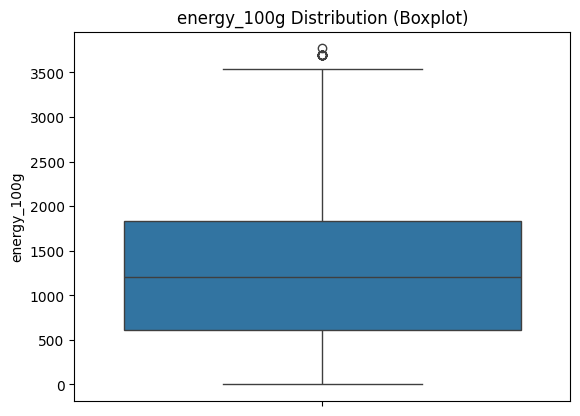

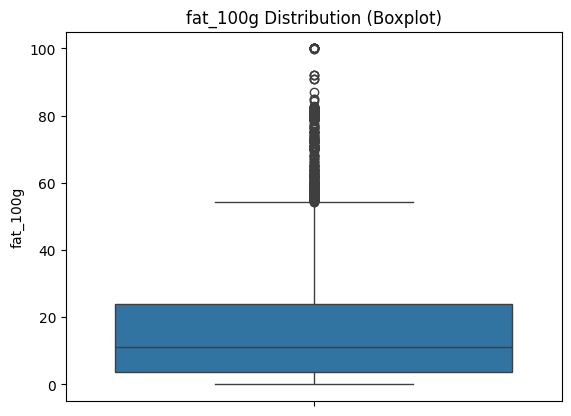

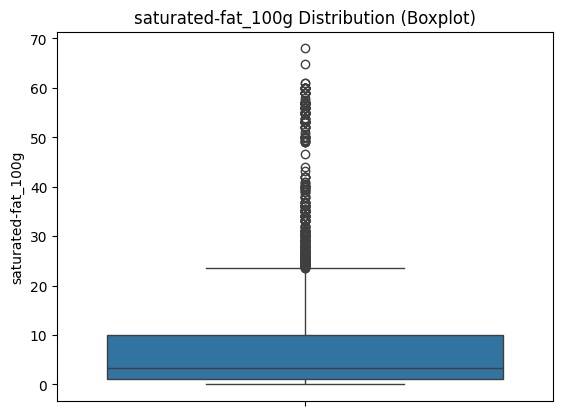

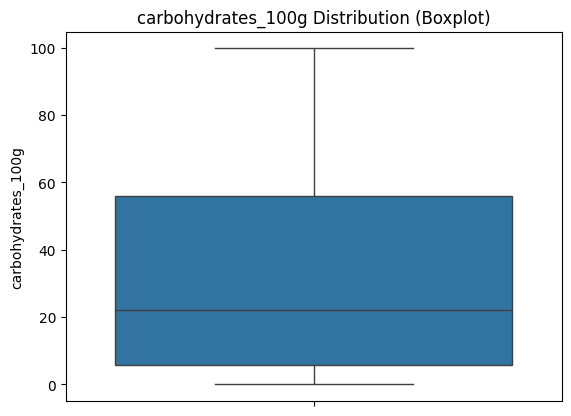

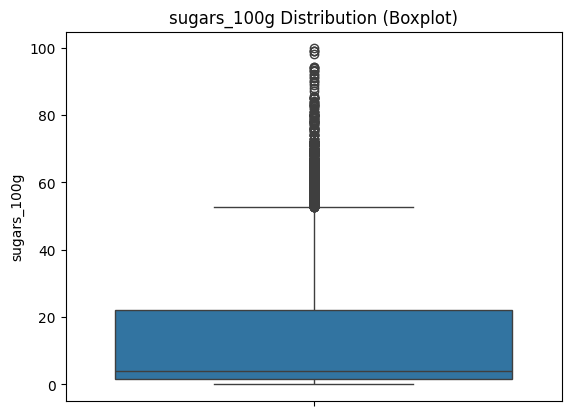

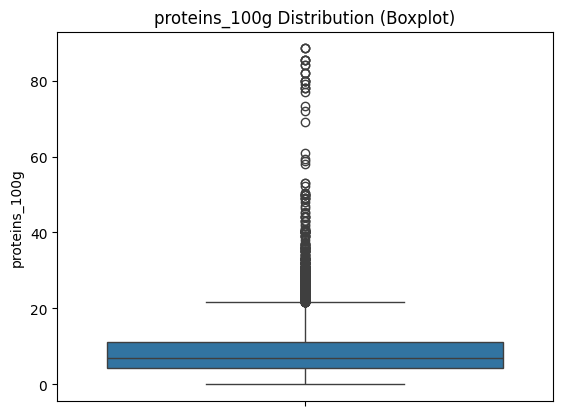

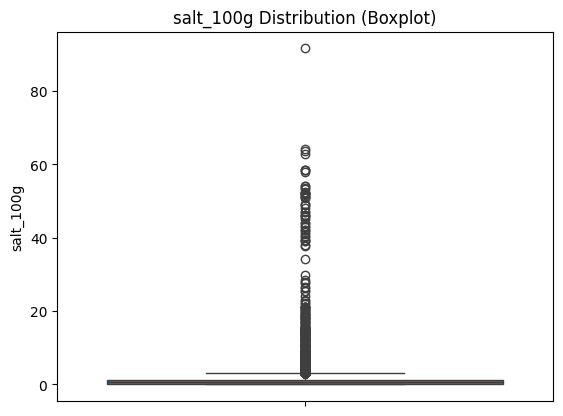

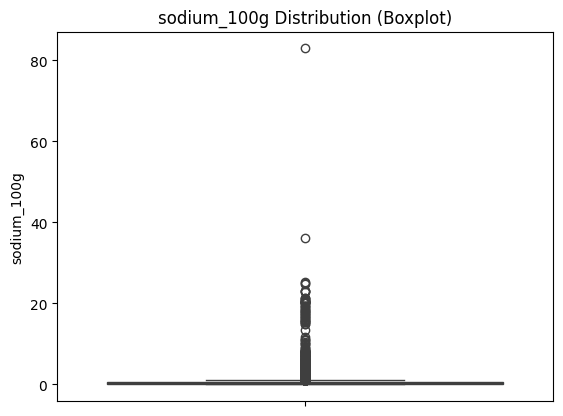

In [57]:
for variable in studied_features :
  if '100g' in variable:
    plot_univariate_variable_analysis(df_refined, variable, 'boxplot')

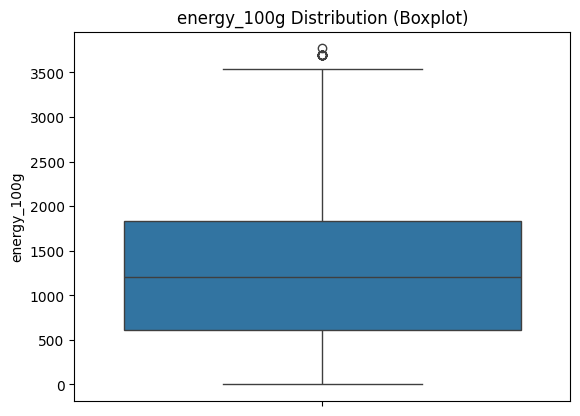

In [58]:
plot_univariate_variable_analysis(df_refined, 'energy_100g', 'boxplot')

### 2.2) Categorical Variables Management

In [59]:
categorical_features = [feature for feature in studied_features if features_by_type[feature] == 'categorical']

In [60]:
categorical_features

['categories_tags',
 'brands_tags',
 'countries_tags',
 'ingredients_text',
 'additives',
 'nutrition_grade_fr']

In [61]:
for feature in categorical_features:
  print(f'{feature} : {len(df_refined[feature].unique())} distinct values')

categories_tags : 8236 distinct values
brands_tags : 6688 distinct values
countries_tags : 237 distinct values
ingredients_text : 23863 distinct values
additives : 23119 distinct values
nutrition_grade_fr : 6 distinct values


#### Initial Distribution

In [62]:
graph_type_per_feature = {'nutrition_grade_fr':'bars', 'countries':'pie_1%', 'brands_tags':'bars' }

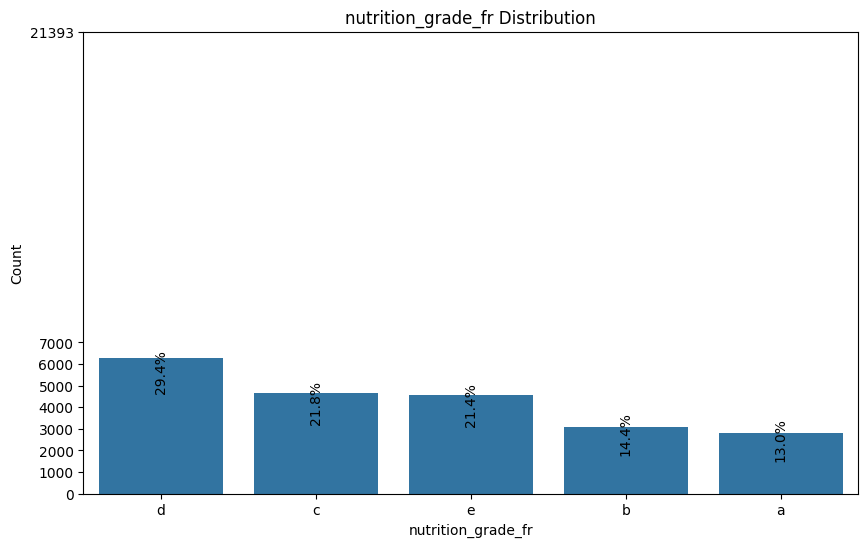

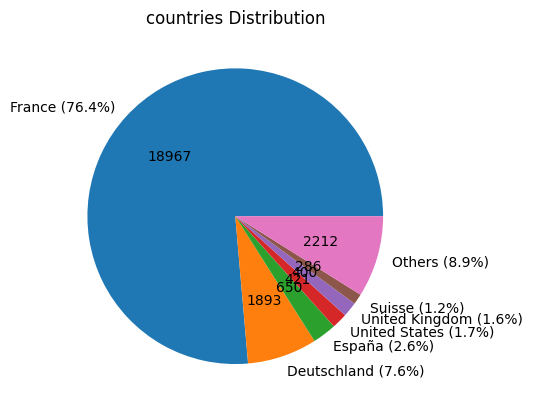

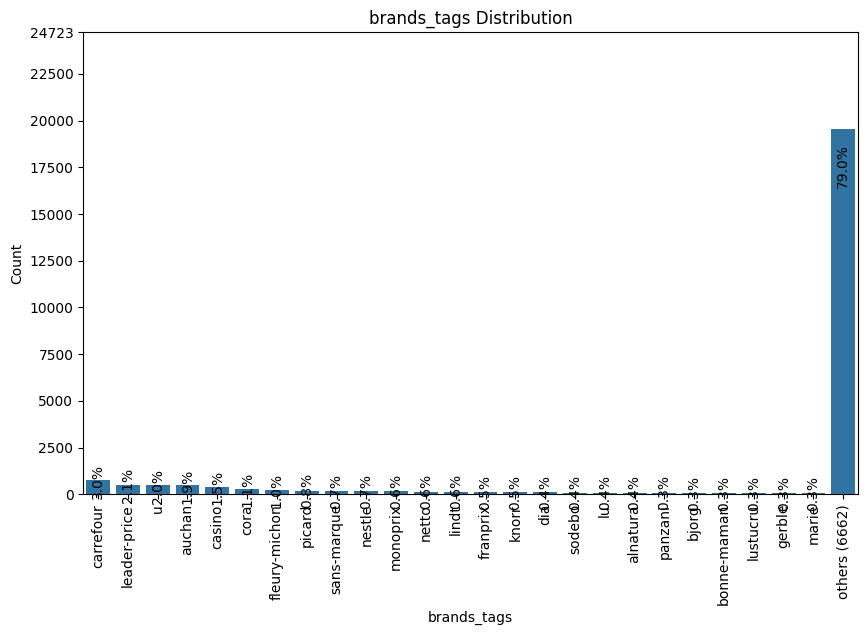

In [63]:
import matplotlib.pyplot as plt
for feature, graph_type in graph_type_per_feature.items():
  plot_univariate_variable_analysis(df_refined, feature, graph_type)

#### Allergens

##### English translation

In [64]:
!pip install deep-translator
from strings_management import translate_all_words_batch, select_key_words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
ncpus = os.cpu_count()

In [66]:
# select ingredients and allergens
ingredients_and_allergens = df[['ingredients_text','allergens']][df['allergens'].astype(str)!='nan'].astype(str)
all_allergens_raw = ingredients_and_allergens['allergens']
all_allergens_raw = all_allergens_raw.unique()

In [67]:
all_allergens_with_context = {}
for index, row in ingredients_and_allergens.iterrows():
  # lower the strings and clean the spaces and undesirable characters
  allergens = select_key_words(row['allergens'])
  # add allergen (if not already added) and a reference ingredients list (helps for translation)
  for allergen in allergens:
    if allergen not in all_allergens_with_context:
      all_allergens_with_context[allergen] = ','.join(select_key_words(row['ingredients_text']))


In [68]:
# place the allergen at first position (no matter the repetition)
for key, value in all_allergens_with_context.items():
  all_allergens_with_context[key] = ':'.join([str(key),str(value)])

In [69]:
# # translate the complete list of ingredients with the allergen at first position (context helps google trad determining the correct language)
# # can take more than 15 minutes for 2000 words (comment it if you have already done the translation and saved the json file)
# translated_allergens_with_context = translate_all_words_batch(all_allergens_with_context.values(), target_language="en", max_workers=ncpus, translator_lib="deep_translator")
# translated_allergens = {key.split(':')[0] : item.split(':')[0] for key, item in translated_allergens_with_context.items()}

In [70]:
import json
translated_allergens_json_file = "translated_allergens.json"

In [71]:
# # save dictionnary
# with open(translated_allergens_json_file, 'w') as f:
#     json.dump(translated_allergens, f, indent=4)

In [72]:
with open(translated_allergens_json_file, 'r') as f:
    translated_dict_loaded = json.load(f)

In [73]:
def allergens_translation(ingredients_list, translation_dict, keep_duplicates=False):
  if ingredients_list is not None and ingredients_list != '' and ingredients_list!='nan':
    ingredients_list = [translation_dict[ingredient] for ingredient in select_key_words(ingredients_list, keep_duplicates=keep_duplicates)]
  else:
    ingredients_list = []
  return ','.join(ingredients_list)

In [74]:
df_refined["allergens_en"] = df_refined['allergens'].astype("string").apply(lambda x: allergens_translation(x, translated_dict_loaded))
features_by_type["allergens_en"] = "categorical"

##### Derivated features

In [75]:
# Make proper list of allergens
df_refined['allergens_list_en'] = df_refined['allergens_en'].apply(lambda x: x.split(','))
features_by_type["allergens_list_en"] = "categorical"
added_containing_lists_features_graphs_types["allergens_list_en"] = 'bars'

In [76]:
# Count the amount of allergens (target feature) (returns np.nan if field is np.nan)
df_refined['allergens_count'] = df_refined['allergens_list_en'].apply(lambda x: len(x)).astype("Int64")
features_by_type["allergens_count"] = "quantitative"
added_features_graphs_types["allergens_count"] = 'bars_10'

#### Ingredients

##### English translation

In [77]:
!pip install deep-translator
from strings_management import translate_all_words_batch, select_key_words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
ncpus = os.cpu_count()

In [79]:
# # translate the complete list of ingredients
# # took 5 hours last time tried for + 20k items
# # can take time (comment it if you have already done the translation and saved the json file)
# # duplicates are kept since duplicates ingredients could be an interesting feature for allergens prediction
# translated_ingredients = translate_all_words_batch(df_refined['ingredients_text'].apply(lambda x: ','.join(select_key_words(x, keep_duplicates=True))).astype('string').values,
#                                                       target_language="en")

In [80]:
import json
translated_ingredients_json_file = "translated_ingredients.json"

In [81]:
# # save dictionnary
# with open(translated_ingredients_json_file, 'w') as f:
#     json.dump(translated_ingredients, f, indent=4)

In [82]:
with open(translated_ingredients_json_file, 'r') as f:
  translated_dict_loaded = json.load(f)

In [83]:
def ingredients_translation(ingredients_list, translation_dict, keep_duplicates=False):
  if ingredients_list is not None and ingredients_list != '' and ingredients_list!='nan':

    translated_ingredients_list = translation_dict[','.join( select_key_words(ingredients_list, keep_duplicates=keep_duplicates) )]
    if translated_ingredients_list is not None:
      translated_ingredients_list = translated_ingredients_list.split(',')
    else:
      print()
      raise AttributeError(f"Error for {','.join(select_key_words(ingredients_list, keep_duplicates=keep_duplicates))}: value is {translated_ingredients_list}")
      translated_ingredients_list = []
  else:
    translated_ingredients_list = []
  return ','.join(translated_ingredients_list)

In [84]:
# create a new column with translated ingredients into english
# df_refined['ingredients_text_en'] = df_refined['ingredients_text'].apply(lambda x: translated_dict_loaded[x])
df_refined["ingredients_text_en"] = df_refined['ingredients_text'].astype("string").apply(lambda x: ingredients_translation(x, translated_dict_loaded, keep_duplicates=False))
features_by_type["ingredients_text_en"] = "categorical"

##### Derivated features

In [85]:
from strings_management import count_words_occurrences
# Count the ocurrencies of each ingredients (returns np.nan if field is np.nan)
df_refined['ingredients_count_en'] = df_refined['ingredients_text_en'].apply(count_words_occurrences)
features_by_type["ingredients_count_en"] = "quantitative"

In [86]:
# Make proper list of ingredients
df_refined['ingredients_lists_en'] = df_refined['ingredients_count_en'].apply(lambda x: list(x.keys()) if not pd.isna(x) else [])
features_by_type['ingredients_lists_en'] = 'categorical'
added_containing_lists_features_graphs_types['ingredients_lists_en'] = 'bars_log'

In [87]:
# Count the amount of different ingredients (returns np.nan if field is np.nan)
df_refined['ingredients_count_en_sum'] = df_refined['ingredients_text_en'].apply(lambda x: len(x.split(',')) if not pd.isna(x) else np.nan
                                                              ).astype("Int64")
features_by_type['ingredients_count_en_sum'] = 'quantitative'
added_features_graphs_types['ingredients_count_en_sum'] = 'hist'

In [88]:
# Have the maximum count for one single ingredient in an ingredients list (returns np.nan if field is np.nan)
df_refined['max_count_for_single_ingredient'] = df_refined['ingredients_count_en'].apply(lambda x: max(x.values()) if not (pd.isna(x) or len(x)==0) else np.nan
                                                                                         ).astype("Int64")
features_by_type['max_count_for_single_ingredient'] = 'quantitative'
added_features_graphs_types['max_count_for_single_ingredient'] = 'bars'

In [89]:
# Have the amount of ingredients that are found 2 times or more inside of the ingredients text (returns np.nan if field is np.nan)
df_refined['repeated_ingredients_count'] = df_refined['ingredients_count_en'].apply(lambda x: sum(val >= 2 for val in x.values()) if not (pd.isna(x) or len(x)==0) else np.nan
                                                                                    ).astype("Int64")
features_by_type['repeated_ingredients_count'] = 'quantitative'
added_features_graphs_types['repeated_ingredients_count'] = 'bars'

In [90]:
# df_refined['repeated_ingredients_count'] = df_refined['ingredients_count_en'].apply(
#     lambda x: sum(val >= 2 for val in x.values()) if not (pd.isna(x) or len(x) == 0) else pd.NA
# ).astype("Int64")  # Conversion explicite au type nullable Int64


#### NutriScore (nutrition_grade_fr)

In [91]:
!git clone https://github.com/MalteIwanicki/NutriScoreCalculator.git

fatal: destination path 'NutriScoreCalculator' already exists and is not an empty directory.


In [92]:
!pip install NutriScoreCalculator/

Processing ./NutriScoreCalculator
  Preparing metadata (setup.py) ... done
  Created wheel for nutri_score_calculator: filename=nutri_score_calculator-0.2-py3-none-any.whl size=6139 sha256=3dc2253cbde3f1d42b67dff5e8411b10befa6cf5b216cb78ea122e1adc6d3e1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7va_d404/wheels/bb/03/42/11e34d85593ff1b54252700c0c025e9844fa32babf3a526c03
Successfully built nutri_score_calculator


In [93]:
from nutri_score_calculator import NutriScoreCalculator, NutriScoreCategory

In [94]:
studied_features

['categories_tags',
 'brands_tags',
 'countries_tags',
 'ingredients_text',
 'additives',
 'ingredients_from_palm_oil_n',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [95]:
indexes_with_missing_nutriscore = df_refined[df_refined['nutrition_grade_fr'].isna()].index.tolist()

In [96]:
# each time "nutrition_grade_fr" is missing, "nutrition-score-fr_100g" too.
# approximation : french nutri-score may be surestimated
for index, row in df_refined.loc[indexes_with_missing_nutriscore].iterrows():
  result = NutriScoreCalculator.calculate_nutri_score(
    category=NutriScoreCategory.ALLGEMEINER_FALL,  # General case
    kilokalorien=row['energy_100g'],  # Kilocalories (if incorect value --> 10 points)
    gesaettigte_fettsaeuren=row['saturated-fat_100g'],  # Saturated fats (if incorect value --> 10 points)
    zucker=row['carbohydrates_100g'],  # Sugars (if incorect value --> 10 points)
    proteine=row['proteins_100g'],  # Proteins (if incorect value --> 5 points)
    salz=row['salt_100g'],  # Salt (if incorect value --> 10 points)
    ballaststoffe=row['fiber_100g'],  # Fiber (if incorect value --> 5 points)
    anteil_obst_gemuese_huelsen_schalen_raps_walnuss_und_olivenoele=np.nan,  # Proportion of fruits, vegetables, legumes, rapeseed, walnuts, and olive oil, (if incorect value --> 5 points)
    )
  df_refined.loc[index,'nutrition_grade_fr'] = result[0][-1].lower()
  df_refined.loc[index,'nutrition-score-fr_100g'] = result[1]

print(f'Estimated nutriscores: {len(indexes_with_missing_nutriscore)}')

Estimated nutriscores: 3457


#### Categories Tags

In [97]:
df_refined['categories_tags'].head()

,categories_tags
184,"en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,fr:sables"
218,"en:plant-based-foods-and-beverages,en:plant-based-foods,en:sugary-snacks,en:confectioneries,en:nuts-and-their-products,en:nut-confectioneries,de:pralinen"
222,"en:desserts,en:puddings,en:christmas-puddings"
242,"en:sugary-snacks,en:biscuits-and-cakes,en:desserts,en:cakes,en:madeleines"
267,"en:dietary-supplements,en:bodybuilding-supplements,en:protein-powders"


In [98]:
from strings_management import translate_word
# create a 'categories_tags_en' column. For each value of "categories_tags" inside of the df_refined dataframe each value is a list coma separated. I want to keep only the elements that are starting with "en" and then remake the coma separated string. Remove "en:" each time

def process_tags_with_language_indicator(tags_str):
  """
  Processes a comma-separated string of categories tags.

  Keeps only the elements starting with "en", removes "en:", and
  reconstructs the comma-separated string.
  If no "en" term is found, try translating the others.

  Args:
    categories_tags_str: A string of comma-separated categories tags.

  Returns:
    A string of comma-separated categories tags starting with "en"
    with "en:" removed, or an np.nan if no such tags are found or can be translated.
  """
  if pd.isna(tags_str) or tags_str == '' or tags_str is None:
    return np.nan
  tags = tags_str.split(',')
  en_tags = [tag[3:] for tag in tags if tag.startswith('en:')]
  if not en_tags:
    en_tags = translate_all_words_batch(
        tags_str.replace(tags_str[0:3],'').split(','), source_language=tags_str[0:2]
        ).values()
    # if translation fails (can be because of bad language indicator) --> try auto with maximum words
    if None in en_tags:
      en_tags = translate_word(
          tags_str.replace(tags_str[0:3],'')
          )['translated'].split(',')
  if en_tags is not None and None not in en_tags:
    return ','.join(list(en_tags))
  else :
    return np.nan

In [99]:
# Create the 'categories_tags_en' column
df_refined['categories_tags_en'] = df_refined['categories_tags'].apply(process_tags_with_language_indicator)
features_by_type['categories_tags_en'] = 'categorical'

An error occurred during batch translation: he --> No support for the provided language.
Please select on of the supported languages:
{'afrikaans': 'af', 'albanian': 'sq', 'amharic': 'am', 'arabic': 'ar', 'armenian': 'hy', 'assamese': 'as', 'aymara': 'ay', 'azerbaijani': 'az', 'bambara': 'bm', 'basque': 'eu', 'belarusian': 'be', 'bengali': 'bn', 'bhojpuri': 'bho', 'bosnian': 'bs', 'bulgarian': 'bg', 'catalan': 'ca', 'cebuano': 'ceb', 'chichewa': 'ny', 'chinese (simplified)': 'zh-CN', 'chinese (traditional)': 'zh-TW', 'corsican': 'co', 'croatian': 'hr', 'czech': 'cs', 'danish': 'da', 'dhivehi': 'dv', 'dogri': 'doi', 'dutch': 'nl', 'english': 'en', 'esperanto': 'eo', 'estonian': 'et', 'ewe': 'ee', 'filipino': 'tl', 'finnish': 'fi', 'french': 'fr', 'frisian': 'fy', 'galician': 'gl', 'georgian': 'ka', 'german': 'de', 'greek': 'el', 'guarani': 'gn', 'gujarati': 'gu', 'haitian creole': 'ht', 'hausa': 'ha', 'hawaiian': 'haw', 'hebrew': 'iw', 'hindi': 'hi', 'hmong': 'hmn', 'hungarian': 'hu', '

In [100]:
df_refined['categories_tags_en'].nunique()

4707

In [101]:
df_refined['categories_tags'].nunique()

8235

In [102]:
# create lists
df_refined['categories_tags_en_list'] = df_refined['categories_tags_en'].astype('string').apply(
    lambda x: list(set(x.lower().split(','))) if not pd.isna(x) else [])
features_by_type['categories_tags_en_list'] = 'categorical'
added_containing_lists_features_graphs_types['categories_tags_en_list'] = 'bars_log'

#### Countries Tags

In [103]:
df_refined['countries_tags']

,countries_tags
184,en:france
218,en:germany
222,en:united-kingdom
242,en:france
267,en:germany
...,...
320613,en:france
320628,en:france
320648,en:france
320652,en:france


In [104]:
# Create the 'categories_tags_en' column
df_refined['countries_tags_en'] = df_refined['countries_tags'].apply(process_tags_with_language_indicator)
features_by_type['categories_tags_en'] = 'categorical'

In [105]:
df_refined['countries_tags_en'].nunique()

225

In [106]:
df_refined['countries_tags'].nunique()

236

In [107]:
# create lists
df_refined['countries_tags_en_list'] = df_refined['countries_tags_en'].astype('string').apply(
    lambda x: list(set(x.lower().split(','))) if not pd.isna(x) else [])
features_by_type['countries_tags_en_list'] = 'categorical'
added_containing_lists_features_graphs_types['countries_tags_en_list'] = 'pie'

In [108]:
df_refined['countries_tags_en_list'].explode().nunique()

75

#### Additives

In [109]:
# Count the amount of additives (returns np.nan if field is np.nan)
df_refined['additives_count'] = df_refined['additives'].apply(lambda x: len(x.split(']')) if not pd.isna(x) else np.nan
                                                              ).astype("Int64")
features_by_type['additives_count'] = 'categorical'
added_features_graphs_types['additives_count'] = 'bars'

#### Final Distribution

In [110]:
graph_type_per_feature = {'nutrition_grade_fr':'bars'}

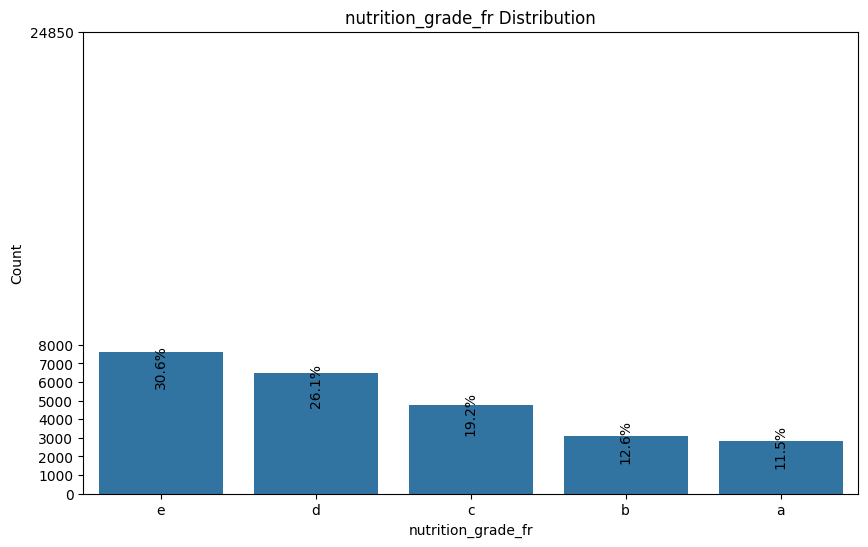

In [111]:
import matplotlib.pyplot as plt
for feature, graph_type in graph_type_per_feature.items():
  plot_univariate_variable_analysis(df_refined, feature, graph_type)

## 4) Analysis (sub-dataframe)

### Variables management examples

ingredients_text

In [112]:
index=  13419

In [113]:
# raw text
df_refined.loc[index]['ingredients_text']

'Chocolat au lait 40% (sucre, beurre de cacao, poudre de _lait_ entier, pâte de cacao, émulsifiant : lécithines (_soja_), arôme), nappage au caramel 21% (sirop de glucose-fructose, stabilisant : glycérol, _lait_ concentré sucré, caramel 4%* (sucre, eau), _beurre_, arôme, sel, gélifiant : pectines), farine de _blé_, sucre, fructose, _lait_ écrémé en poudre, _beurre_ pâtissier, colorant : caramel ordinaire, émulsifiant : lécithines (_soja_), sel. *% exprimé sur le nappage équivalent à 0.8% sur l’ensemble du produit. '

In [114]:
# lower cases
df_refined.loc[index]['ingredients_text'].lower()

'chocolat au lait 40% (sucre, beurre de cacao, poudre de _lait_ entier, pâte de cacao, émulsifiant : lécithines (_soja_), arôme), nappage au caramel 21% (sirop de glucose-fructose, stabilisant : glycérol, _lait_ concentré sucré, caramel 4%* (sucre, eau), _beurre_, arôme, sel, gélifiant : pectines), farine de _blé_, sucre, fructose, _lait_ écrémé en poudre, _beurre_ pâtissier, colorant : caramel ordinaire, émulsifiant : lécithines (_soja_), sel. *% exprimé sur le nappage équivalent à 0.8% sur l’ensemble du produit. '

In [115]:
# select key words
','.join(select_key_words(df_refined.loc[index]['ingredients_text'], keep_duplicates=False))

'chocolat au lait sucre,beurre de cacao,poudre de lait entier,pâte de cacao,émulsifiant lécithines soja,arôme,nappage au caramel sirop de glucose fructose,stabilisant glycérol,lait concentré sucré,caramel sucre,eau,beurre,arôme,sel,gélifiant pectines,farine de blé,sucre,fructose,lait écrémé en poudre,beurre pâtissier,colorant caramel ordinaire,émulsifiant lécithines soja,sel exprimé sur le nappage équivalent à sur l ensemble du produit'

In [116]:
# remove duplicates
','.join(select_key_words(df_refined.loc[index]['ingredients_text'], keep_duplicates=True))

'chocolat au lait sucre,beurre de cacao,poudre de lait entier,pâte de cacao,émulsifiant lécithines soja,arôme,nappage au caramel sirop de glucose fructose,stabilisant glycérol,lait concentré sucré,caramel sucre,eau,beurre,sel,gélifiant pectines,farine de blé,sucre,fructose,lait écrémé en poudre,beurre pâtissier,colorant caramel ordinaire,sel exprimé sur le nappage équivalent à sur l ensemble du produit'

In [117]:
# translate text
english_text = translate_word(','.join(select_key_words(df_refined.loc[index]['ingredients_text'], keep_duplicates=True)) )['translated'].lower()
english_text

'sugar milk chocolate, cocoa butter, whole milk powder, cocoa paste, soy lecithins emulsifier, aroma, caramel crippage fructose glucose syrup, glycérol stabilizer, sweet concentrated milk, caramel sugar, water, butter, salt, gélifying pectin , wheat flour, sugar, fructose, skimmed milk powder, butter pastry chef, ordinary caramel coloring, salt expressed on the topping equivalent to the whole product'

In [118]:
# turn text to list
print(english_text.split(','))

['sugar milk chocolate', ' cocoa butter', ' whole milk powder', ' cocoa paste', ' soy lecithins emulsifier', ' aroma', ' caramel crippage fructose glucose syrup', ' glycérol stabilizer', ' sweet concentrated milk', ' caramel sugar', ' water', ' butter', ' salt', ' gélifying pectin ', ' wheat flour', ' sugar', ' fructose', ' skimmed milk powder', ' butter pastry chef', ' ordinary caramel coloring', ' salt expressed on the topping equivalent to the whole product']


In [119]:
# explode dataset
df_refined[['code', 'allergens_en', 'ingredients_count_en_sum', 'ingredients_lists_en']].explode('ingredients_lists_en').loc[index]

,code,allergens_en,ingredients_count_en_sum,ingredients_lists_en
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,sugar milk chocolate
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,cocoa butter
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,whole milk powder
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,cocoa paste
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,soy lecithins emulsifier
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,aroma
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,caramel crippage fructose glucose syrup
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,glycérol stabilizer
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,sweet concentrated milk
13419,1664,"milk,soy,milk,butter,wheat,milk,butter,soy",35,caramel sugar


In [120]:
# count distinct categories before
df_refined['ingredients_text'].nunique()

23863

In [121]:
# count distinct categories after
df_refined['ingredients_lists_en'].explode().nunique()

56878

It seems that some cleaning remains to do : select_key_words() function could be improved (plural detection etc.)

In [122]:
# Only keep categories that have more than 5 occurrencies

# Explode the 'ingredients_lists_en' column and count unique values
ingredient_counts = df_refined['ingredients_lists_en'].explode().value_counts()

# Filter out categories with less than 5 occurrences
filtered_ingredients = ingredient_counts[ingredient_counts > 5]

# Print the filtered ingredients and their counts
filtered_ingredients


,count
ingredients_lists_en,
salt,13478
sugar,10877
water,8669
wheat flour,5253
sunflower oil,3137
...,...
candied watermelons,6
refined sunflower oil,6
cow s pasteurized milk,6


### Before and After cleaning

In [123]:
from data_analysis_functions import plot_differences_between_original_and_corrected_dataset, plot_comparison_between_original_and_corrected_dataset

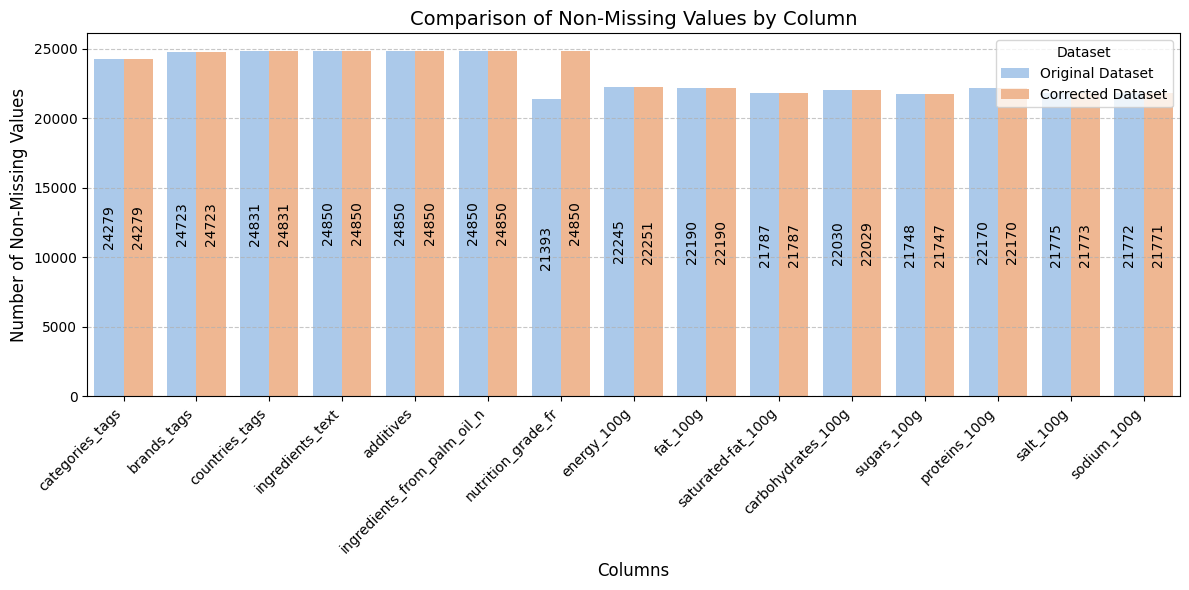

In [124]:
plot_comparison_between_original_and_corrected_dataset(df_target_feature_only_free_duplicates[studied_features], df_refined[studied_features])

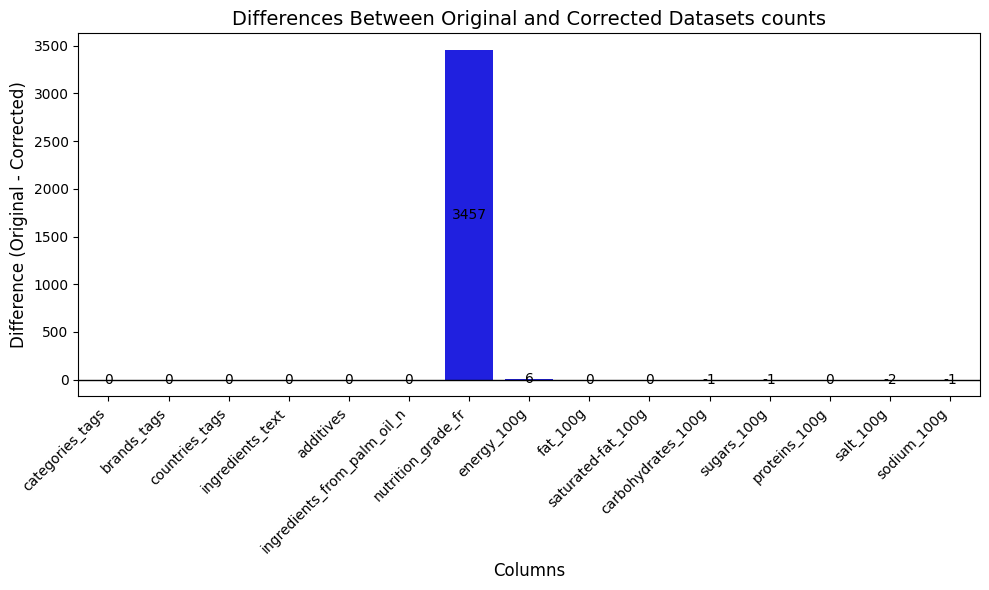

In [125]:
plot_differences_between_original_and_corrected_dataset(df_target_feature_only_free_duplicates[studied_features], df_refined[studied_features])

Result can seem disappointing but the main part of the work was refining the data since the amount of empty fields is quite low

### Univariate

In [126]:
added_features_graphs_types

{'allergens_count': 'bars_10',
 'ingredients_count_en_sum': 'hist',
 'max_count_for_single_ingredient': 'bars',
 'repeated_ingredients_count': 'bars',
 'additives_count': 'bars'}

In [127]:
added_containing_lists_features_graphs_types


{'allergens_list_en': 'bars',
 'ingredients_lists_en': 'bars_log',
 'categories_tags_en_list': 'bars_log',
 'countries_tags_en_list': 'pie'}

In [128]:
graph_type_per_feature = {'nutrition_grade_fr':'bars', 'brands_tags':'bars' }
for variable in quantitative_features :
  if '100g' in variable:
    graph_type_per_feature[variable] = 'boxplot'
  else:
    graph_type_per_feature[variable] = 'bars'
graph_type_per_feature.update(added_features_graphs_types)

In [129]:
remaining_features = [feature for feature in studied_features if feature not in graph_type_per_feature.keys()]

In [130]:
remaining_features

['categories_tags', 'countries_tags', 'ingredients_text', 'additives']

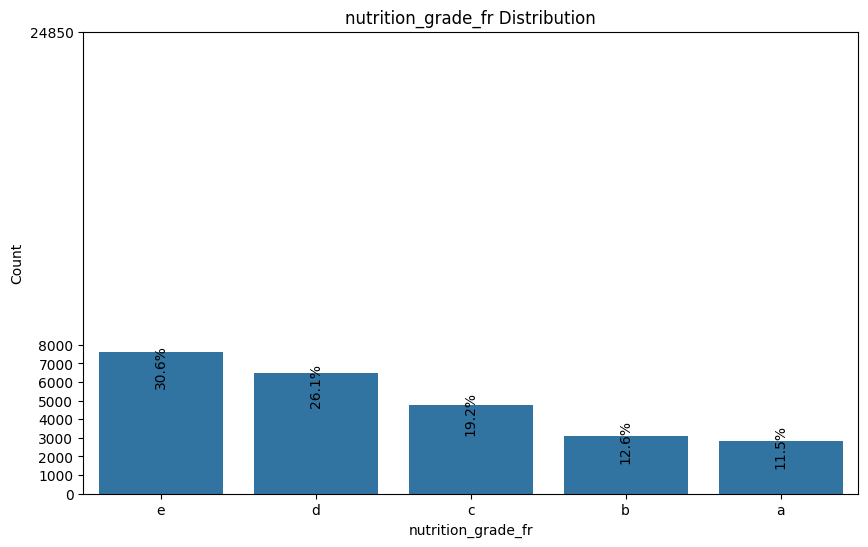

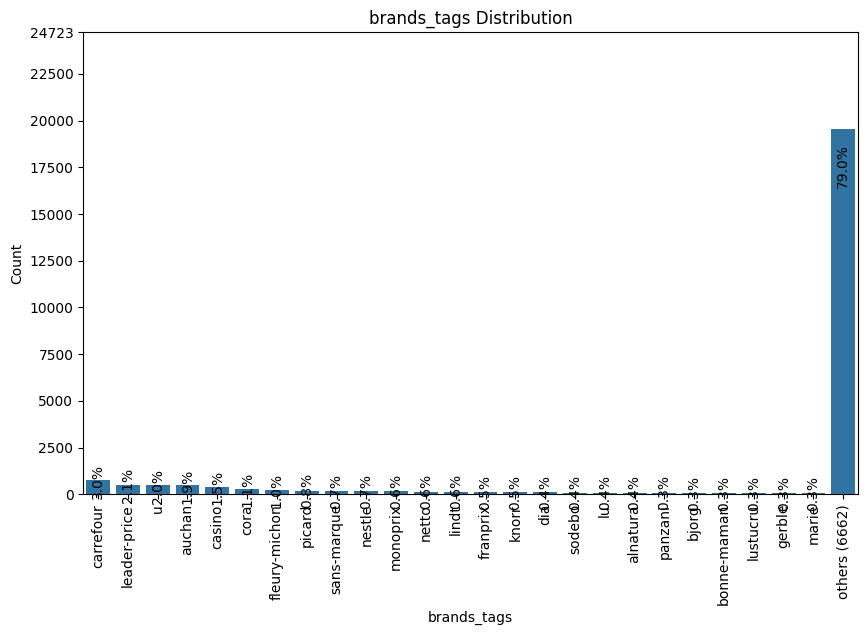

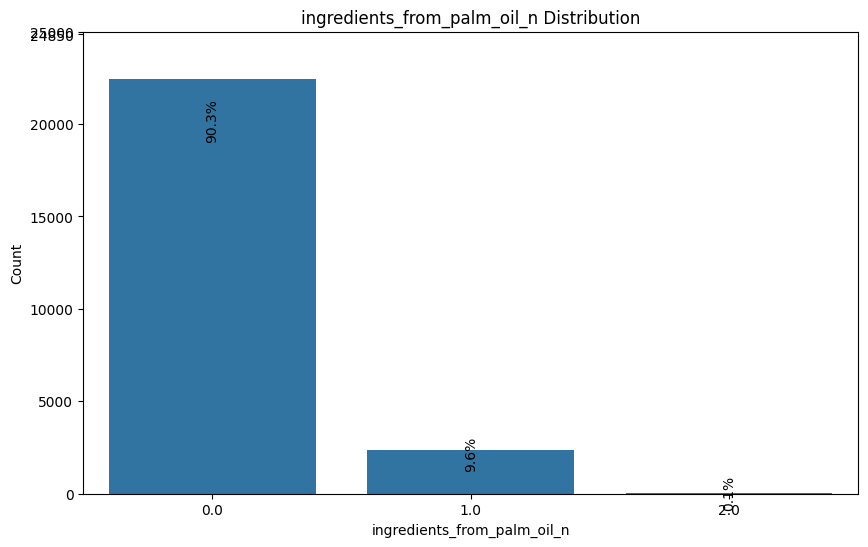

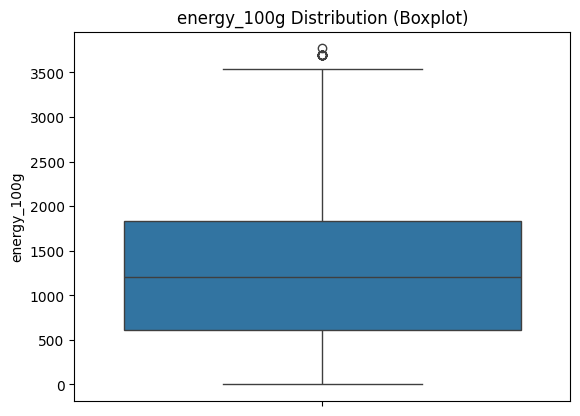

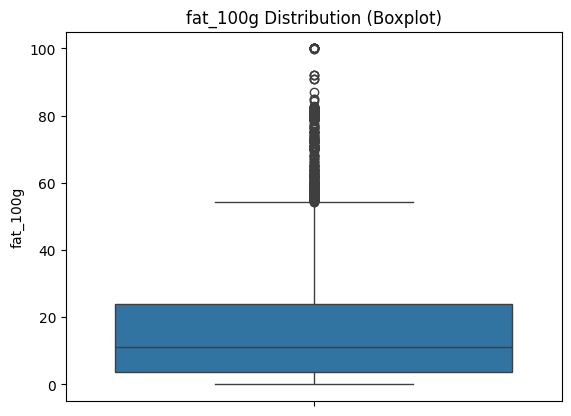

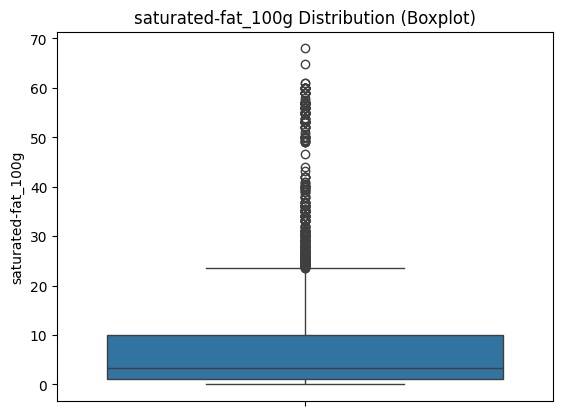

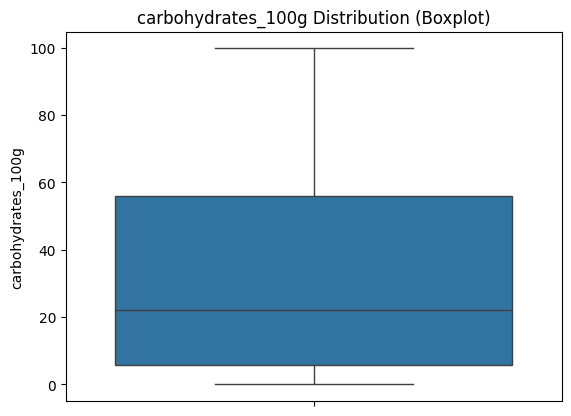

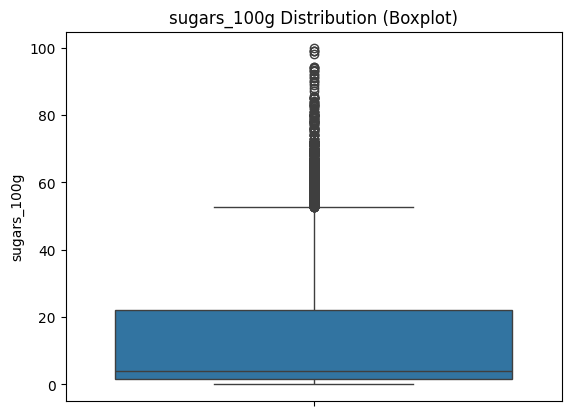

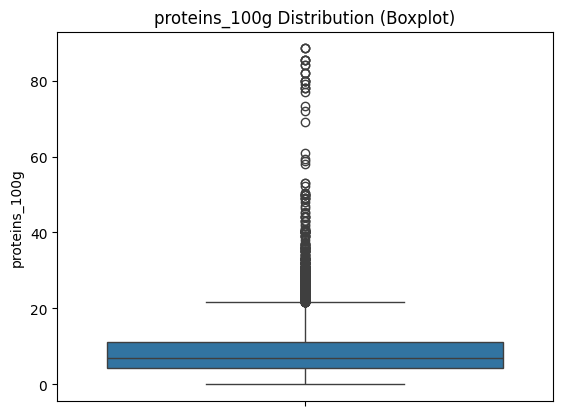

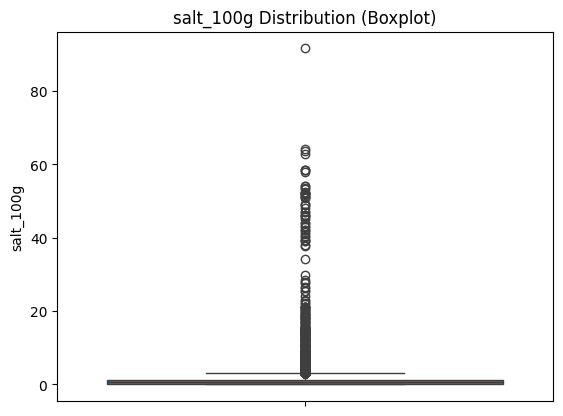

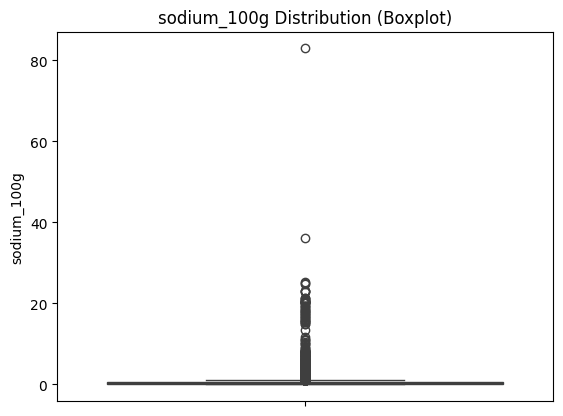

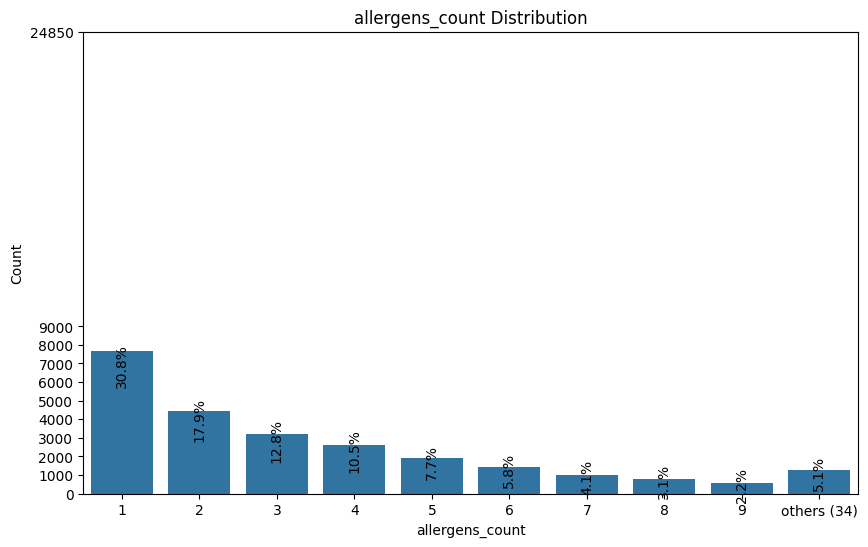

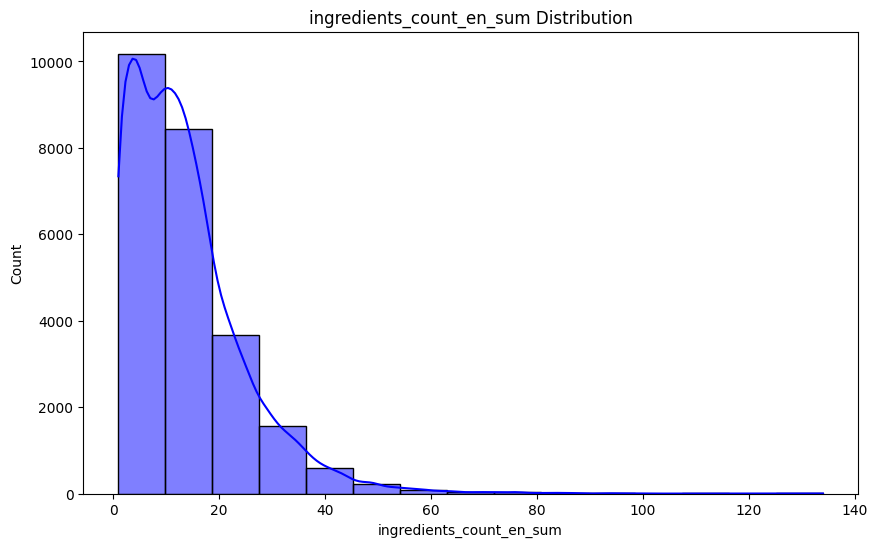

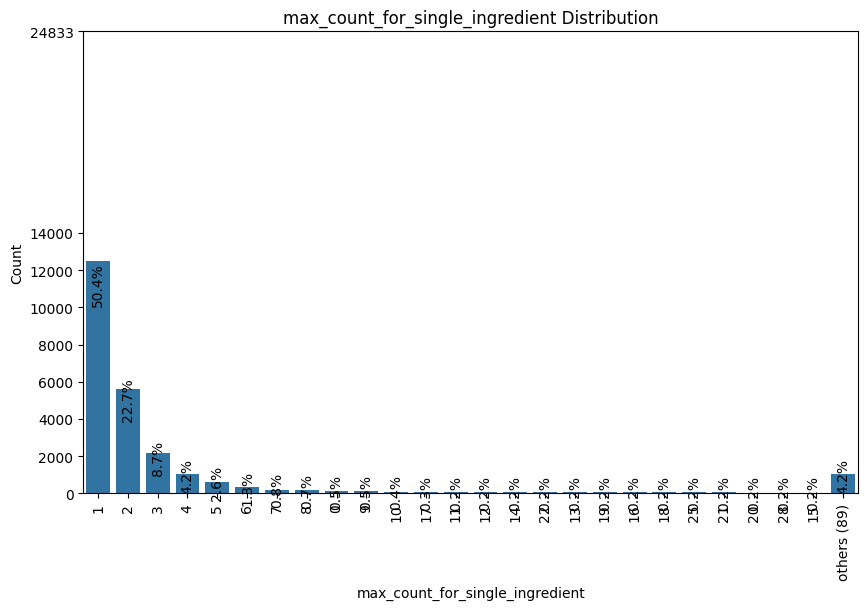

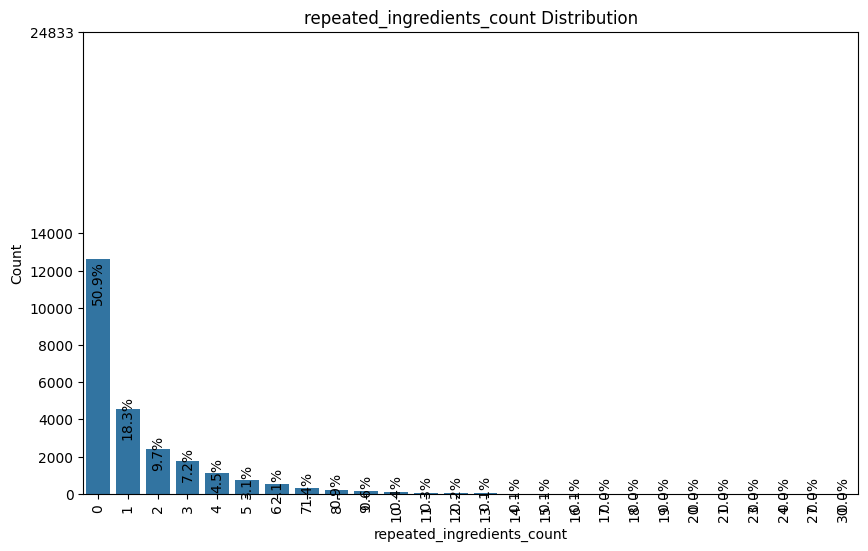

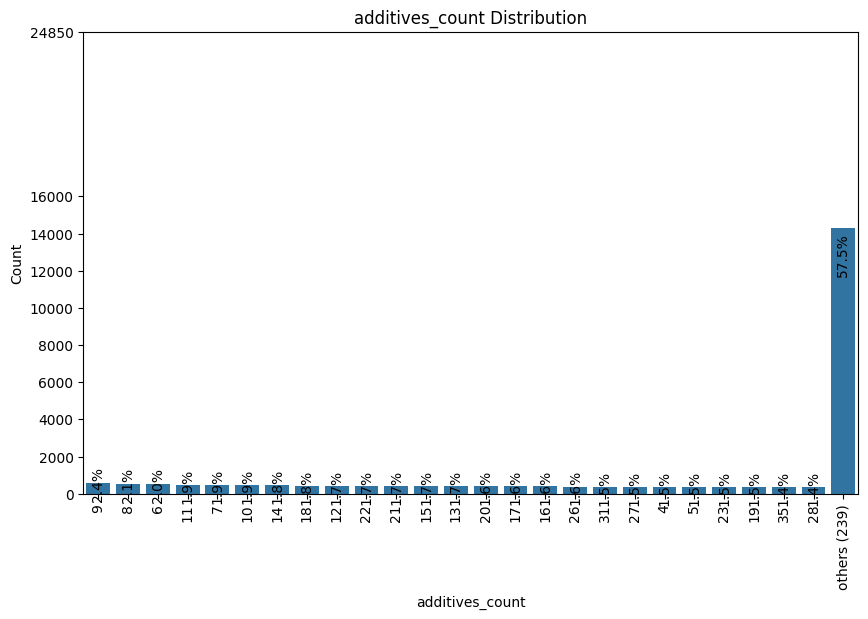

In [131]:
from data_analysis_functions import plot_univariate_variable_analysis
for feature, graph_type in graph_type_per_feature.items():
  plot_univariate_variable_analysis(df_refined, feature, graph_type)

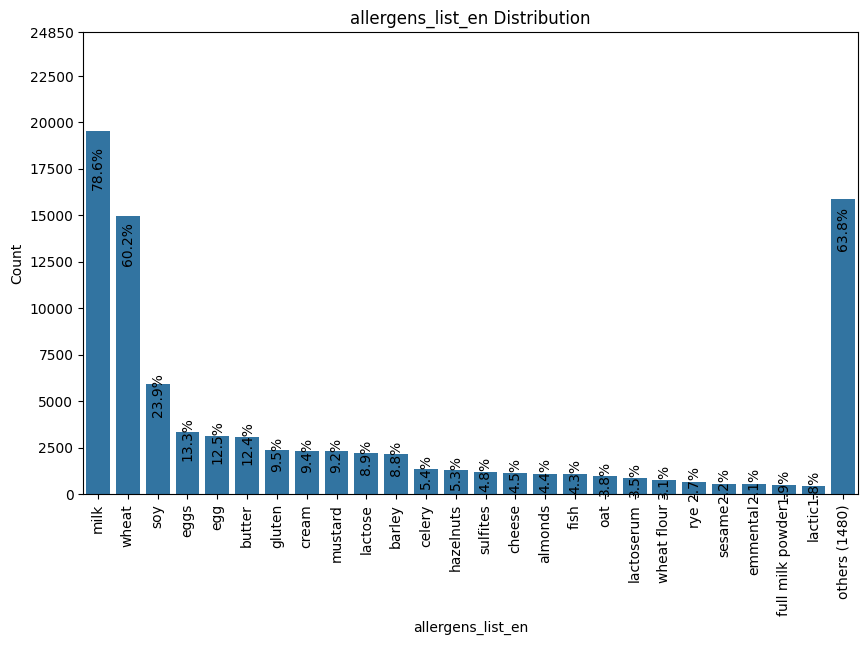

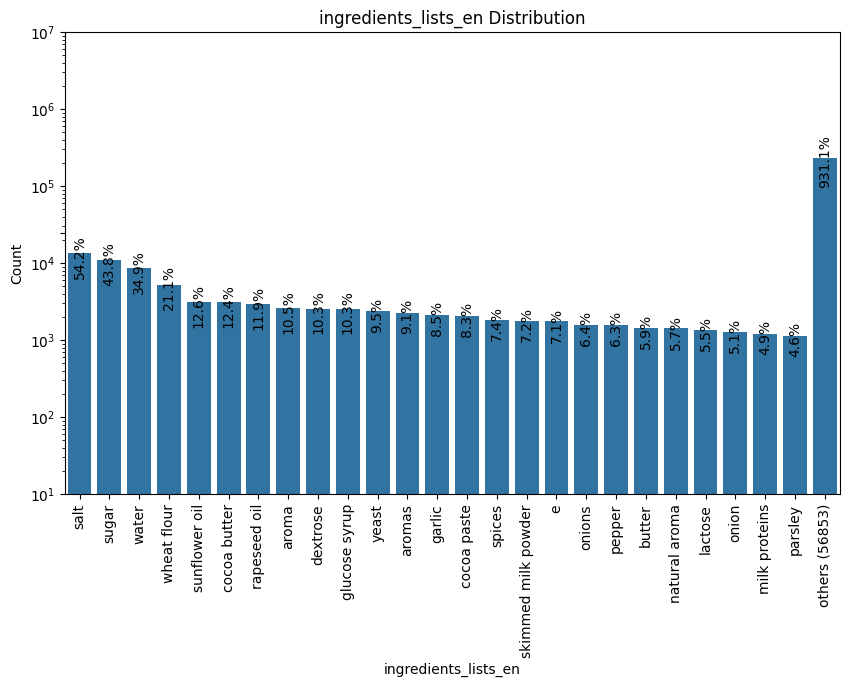

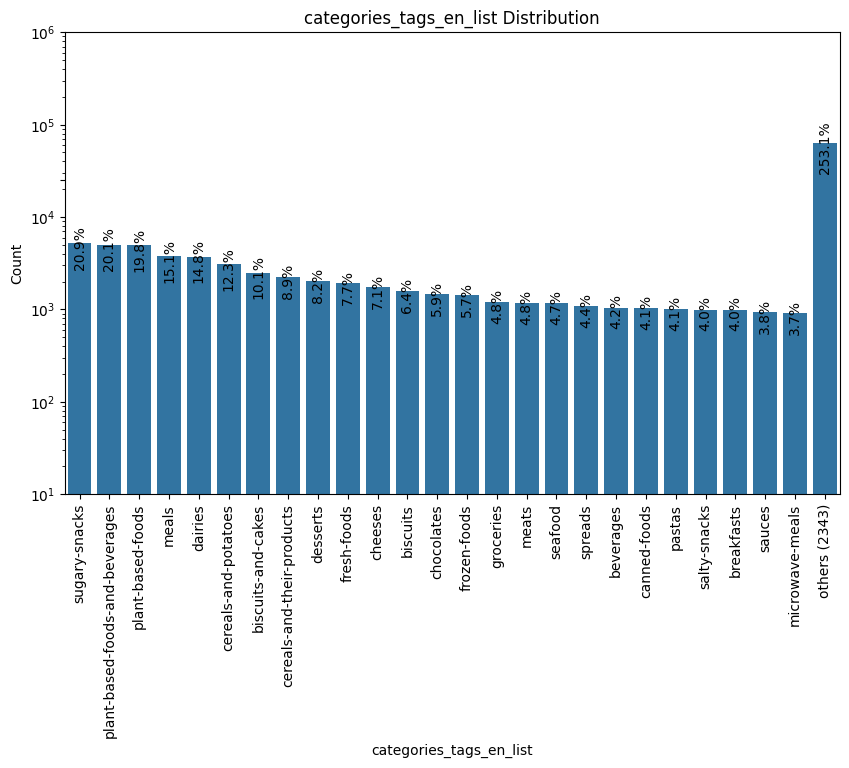

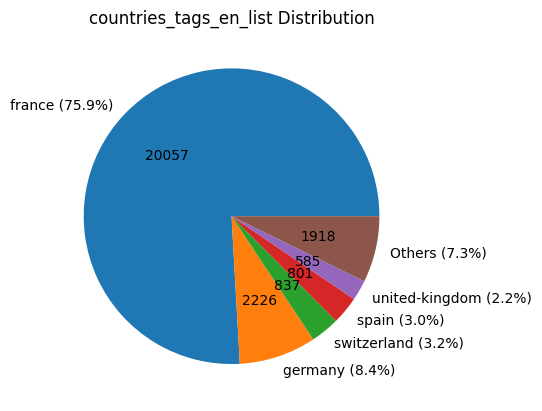

In [132]:
# explode lists
for feature, graph_type in added_containing_lists_features_graphs_types.items():
  plot_univariate_variable_analysis(df_refined.explode(feature), feature, graph_type, is_splitted=True)

### Bivariate

In [133]:
bivariate_analysis_parameters = pd.DataFrame(columns=['variable1_name', 'variable2_name', 'graph_type', 'title', 'test_type', 'stat_indicator', 'p-value'])

In [134]:
from data_analysis_functions import plot_bivariate_variable_analysis,compute_bivariate_stats_indicators

#### Correlations (R)

In [135]:
graph_type_per_feature

{'nutrition_grade_fr': 'bars',
 'brands_tags': 'bars',
 'ingredients_from_palm_oil_n': 'bars',
 'energy_100g': 'boxplot',
 'fat_100g': 'boxplot',
 'saturated-fat_100g': 'boxplot',
 'carbohydrates_100g': 'boxplot',
 'sugars_100g': 'boxplot',
 'proteins_100g': 'boxplot',
 'salt_100g': 'boxplot',
 'sodium_100g': 'boxplot',
 'allergens_count': 'bars_10',
 'ingredients_count_en_sum': 'hist',
 'max_count_for_single_ingredient': 'bars',
 'repeated_ingredients_count': 'bars',
 'additives_count': 'bars'}

In [136]:
quantitative_features_to_plot = [feature for feature in graph_type_per_feature.keys() if features_by_type[feature]=='quantitative']

In [137]:
from data_analysis_functions import compute_bivariate_stats_indicators, format_coefficient

In [138]:
for feature in quantitative_features_to_plot:
  result = compute_bivariate_stats_indicators(df_refined[feature],df_refined["allergens_count"])
  result = [format_coefficient(coeff) for coeff in result]
  bivariate_analysis_parameters.loc[len(bivariate_analysis_parameters)] = [feature, 'allergens_count', 'scatter',
                                                                            f'R,p-value={",".join(result)}', 'Pearson',
                                                                           result[0], result[1]]

In [139]:
bivariate_analysis_parameters

,variable1_name,variable2_name,graph_type,title,test_type,stat_indicator,p-value
0,ingredients_from_palm_oil_n,allergens_count,scatter,"R,p-value=0.19,0.0",Pearson,0.19,0.0
1,energy_100g,allergens_count,scatter,"R,p-value=0.1,0.0",Pearson,0.1,0.0
2,fat_100g,allergens_count,scatter,"R,p-value=0.01,0.1",Pearson,0.01,0.1
3,saturated-fat_100g,allergens_count,scatter,"R,p-value=0.05,0.0",Pearson,0.05,0.0
4,carbohydrates_100g,allergens_count,scatter,"R,p-value=0.17,0.0",Pearson,0.17,0.0
5,sugars_100g,allergens_count,scatter,"R,p-value=0.18,0.0",Pearson,0.18,0.0
6,proteins_100g,allergens_count,scatter,"R,p-value=-0.11,0.0",Pearson,-0.11,0.0
7,salt_100g,allergens_count,scatter,"R,p-value=-0.05,0.0",Pearson,-0.05,0.0
8,sodium_100g,allergens_count,scatter,"R,p-value=-0.05,0.0",Pearson,-0.05,0.0
9,allergens_count,allergens_count,scatter,"R,p-value=1.0,0.0",Pearson,1.0,0.0


#### ANOVA

Disclaimer : Managing  ANOVA  Analysis while exploding tables (lists) can lead to refuse the independance hypothesis inside of a given variable. To complete the analysis, man should use more complex models (e.g : Linear Mixed-Effects Models)

In [140]:
added_containing_lists_features_graphs_types

{'allergens_list_en': 'bars',
 'ingredients_lists_en': 'bars_log',
 'categories_tags_en_list': 'bars_log',
 'countries_tags_en_list': 'pie'}

In [141]:
for feature in added_containing_lists_features_graphs_types.keys():
  # Create a temporary DataFrame to avoid modifying the original
  temp_df = df_refined[[feature, "allergens_count"]].explode(feature)

  result = compute_bivariate_stats_indicators(temp_df[feature],temp_df["allergens_count"])

  result = [format_coefficient(coeff) for coeff in result[1:3]]

  bivariate_analysis_parameters.loc[len(bivariate_analysis_parameters)] = [feature, 'allergens_count', 'boxplot',
                                                                            f'η²,p-value={",".join(result)}', 'ANOVA',
                                                                           result[0], result[1]]

In [142]:
# Create a temporary DataFrame to avoid modifying the original
feature = 'nutrition_grade_fr'

temp_df = df_refined[[feature, "allergens_count"]].explode(feature)

result = compute_bivariate_stats_indicators(temp_df[feature],temp_df["allergens_count"])

result = [format_coefficient(coeff) for coeff in result[1:3]]
bivariate_analysis_parameters.loc[len(bivariate_analysis_parameters)] = [feature, 'allergens_count', 'boxplot',
                                                                          f'η²,p-value={",".join(result)}','ANOVA',
                                                                         result[0], result[1]]

In [143]:
bivariate_analysis_parameters

,variable1_name,variable2_name,graph_type,title,test_type,stat_indicator,p-value
0,ingredients_from_palm_oil_n,allergens_count,scatter,"R,p-value=0.19,0.0",Pearson,0.19,0.0
1,energy_100g,allergens_count,scatter,"R,p-value=0.1,0.0",Pearson,0.1,0.0
2,fat_100g,allergens_count,scatter,"R,p-value=0.01,0.1",Pearson,0.01,0.1
3,saturated-fat_100g,allergens_count,scatter,"R,p-value=0.05,0.0",Pearson,0.05,0.0
4,carbohydrates_100g,allergens_count,scatter,"R,p-value=0.17,0.0",Pearson,0.17,0.0
5,sugars_100g,allergens_count,scatter,"R,p-value=0.18,0.0",Pearson,0.18,0.0
6,proteins_100g,allergens_count,scatter,"R,p-value=-0.11,0.0",Pearson,-0.11,0.0
7,salt_100g,allergens_count,scatter,"R,p-value=-0.05,0.0",Pearson,-0.05,0.0
8,sodium_100g,allergens_count,scatter,"R,p-value=-0.05,0.0",Pearson,-0.05,0.0
9,allergens_count,allergens_count,scatter,"R,p-value=1.0,0.0",Pearson,1.0,0.0


In [144]:
quantitative_features_to_plot

['ingredients_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'allergens_count',
 'ingredients_count_en_sum',
 'max_count_for_single_ingredient',
 'repeated_ingredients_count']

In [145]:
for feature in quantitative_features_to_plot:
  # Create a temporary DataFrame to avoid modifying the original
  temp_df = df_refined[[feature, "allergens_list_en"]].explode('allergens_list_en')

  result = compute_bivariate_stats_indicators(temp_df["allergens_list_en"],temp_df[feature])

  result = [format_coefficient(coeff) for coeff in result[1:3]]

  bivariate_analysis_parameters.loc[len(bivariate_analysis_parameters)] = [feature, 'allergens_list_en', 'boxplot',
                                                                            f'η²,p-value={",".join(result)}', 'ANOVA_2',
                                                                           result[0], result[1]]

#### Khi2

In [146]:
added_containing_lists_features_graphs_types

{'allergens_list_en': 'bars',
 'ingredients_lists_en': 'bars_log',
 'categories_tags_en_list': 'bars_log',
 'countries_tags_en_list': 'pie'}

In [147]:
for feature in list(added_containing_lists_features_graphs_types.keys()):
  if feature != 'allergens_list_en':
    # Create a temporary DataFrame to avoid modifying the original
    temp_df = df_refined[[feature, "allergens_list_en"]].explode(feature).explode('allergens_list_en')

    # for col in temp_df.columns:
    #   # Filter rare categories with less than 5 occurrencies
    #   threshold = 5
    #   temp_df = temp_df[temp_df[col].isin(temp_df[col].value_counts()[lambda x: x >= threshold].index)]

    # print(feature)
    # print(max(temp_df[feature].nunique(), temp_df['allergens_list_en'].nunique()))
    # print(min(temp_df[feature].nunique(), temp_df['allergens_list_en'].nunique()))

    result = compute_bivariate_stats_indicators(temp_df[feature],temp_df["allergens_list_en"])

    result = [format_coefficient(coeff) for coeff in result[1:3]]
    bivariate_analysis_parameters.loc[len(bivariate_analysis_parameters)] = [feature, 'allergens_list_en', 'boxplot',
                                                                              f'V-cramer,p-value={",".join(result)}','Khi2',
                                                                             result[0], result[1]]

In [148]:
feature = 'nutrition_grade_fr'

# Create a temporary DataFrame to avoid modifying the original
temp_df = df_refined[[feature, "allergens_list_en"]].explode(feature).explode('allergens_list_en')

# for col in temp_df.columns:
#   # Filter rare categories with less than 5 occurrencies
#   threshold = 5
#   temp_df = temp_df[temp_df[col].isin(temp_df[col].value_counts()[lambda x: x >= threshold].index)]

result = compute_bivariate_stats_indicators(temp_df[feature],temp_df["allergens_list_en"])

result = [format_coefficient(coeff) for coeff in result[1:3]]
bivariate_analysis_parameters.loc[len(bivariate_analysis_parameters)] = [feature, 'allergens_list_en', '-',
                                                                          f'V-cramer,p-value={",".join(result)}','Khi2',
                                                                         result[0], result[1]]

In [149]:
bivariate_analysis_parameters

,variable1_name,variable2_name,graph_type,title,test_type,stat_indicator,p-value
0,ingredients_from_palm_oil_n,allergens_count,scatter,"R,p-value=0.19,0.0",Pearson,0.19,0.0
1,energy_100g,allergens_count,scatter,"R,p-value=0.1,0.0",Pearson,0.1,0.0
2,fat_100g,allergens_count,scatter,"R,p-value=0.01,0.1",Pearson,0.01,0.1
3,saturated-fat_100g,allergens_count,scatter,"R,p-value=0.05,0.0",Pearson,0.05,0.0
4,carbohydrates_100g,allergens_count,scatter,"R,p-value=0.17,0.0",Pearson,0.17,0.0
5,sugars_100g,allergens_count,scatter,"R,p-value=0.18,0.0",Pearson,0.18,0.0
6,proteins_100g,allergens_count,scatter,"R,p-value=-0.11,0.0",Pearson,-0.11,0.0
7,salt_100g,allergens_count,scatter,"R,p-value=-0.05,0.0",Pearson,-0.05,0.0
8,sodium_100g,allergens_count,scatter,"R,p-value=-0.05,0.0",Pearson,-0.05,0.0
9,allergens_count,allergens_count,scatter,"R,p-value=1.0,0.0",Pearson,1.0,0.0


### Multivariate

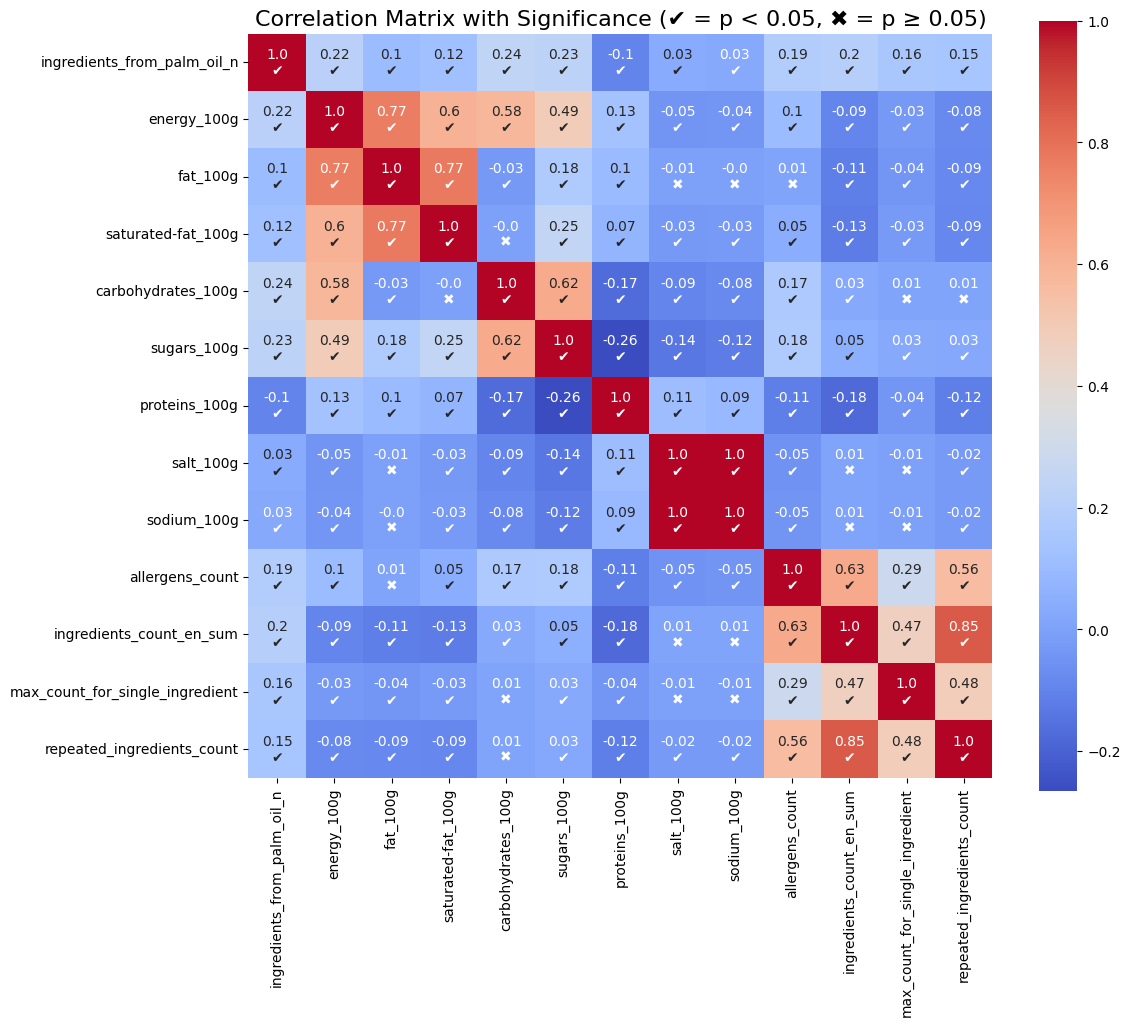

In [150]:
from data_analysis_functions import correlation_matrix_with_p_values

# Assuming df_refined and features_by_type are defined as in your provided code

quantitative_features_to_plot = [feature for feature in graph_type_per_feature.keys() if features_by_type[feature] == 'quantitative']

# Select only quantitative features from the DataFrame
quantitative_df = df_refined[quantitative_features_to_plot]

# Display correlation matrix with p-values tags
correlation_matrix_with_p_values(quantitative_df)


In [151]:
from data_analysis_functions import pca_analysis

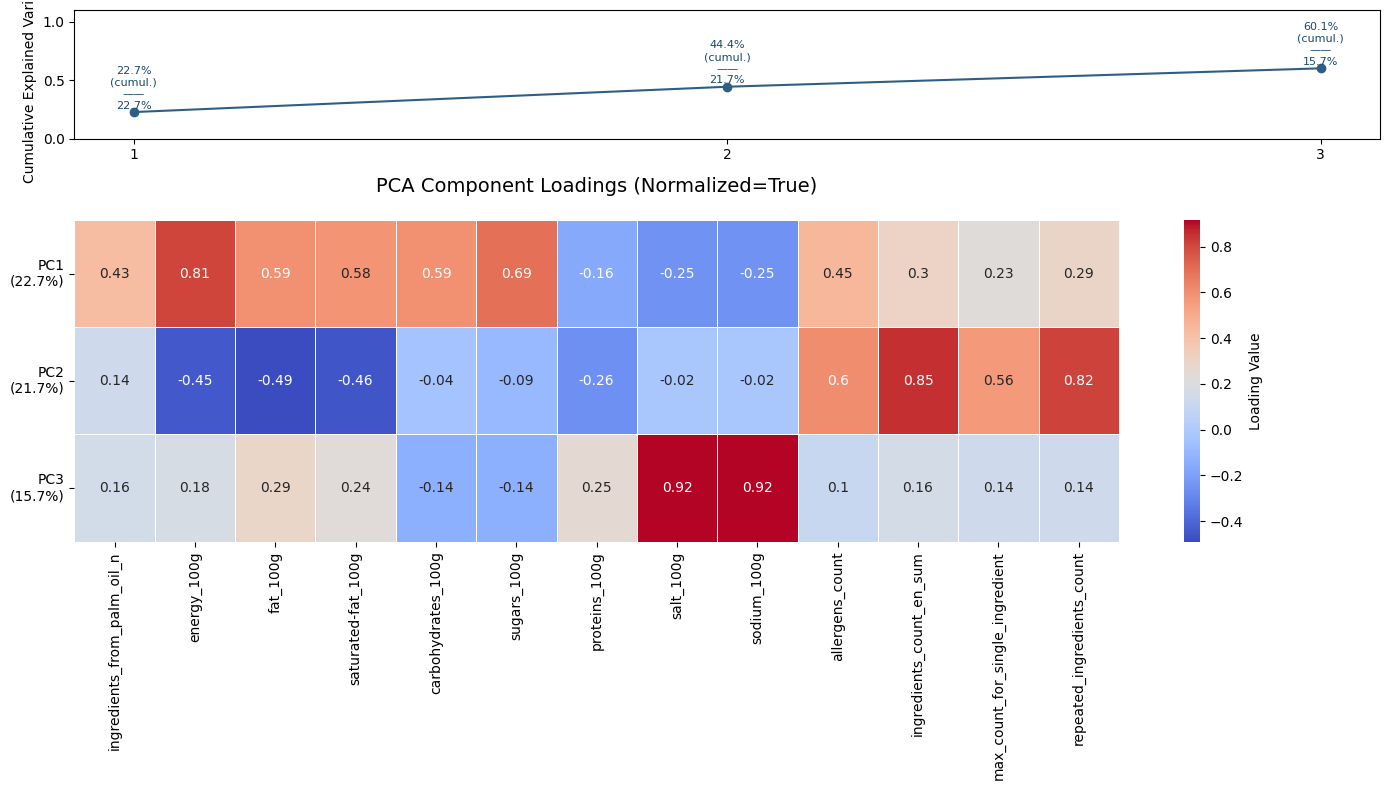

In [152]:
pca_analysis(df_refined[quantitative_features_to_plot], n_components=3)

In [153]:
from data_analysis_functions import eta_squared_with_p_heatmap

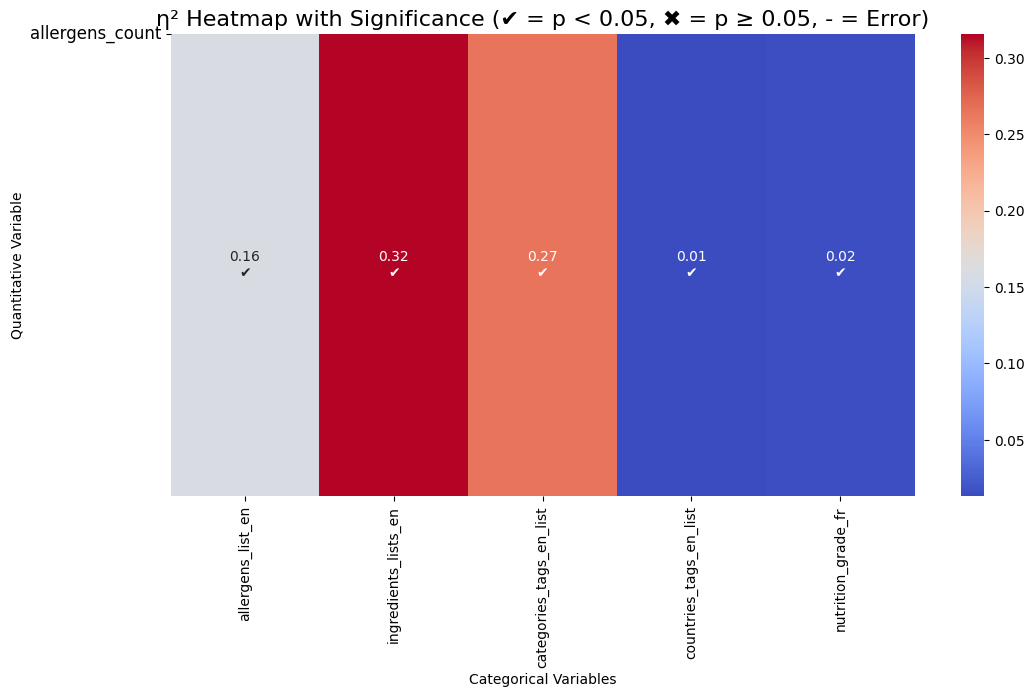

In [154]:
ANOVA_variables = np.concatenate((bivariate_analysis_parameters[bivariate_analysis_parameters['test_type']=="ANOVA"]['variable1_name'].values,['allergens_count']))
eta_squared_with_p_heatmap(df_refined[ANOVA_variables], dependent_var='allergens_count')

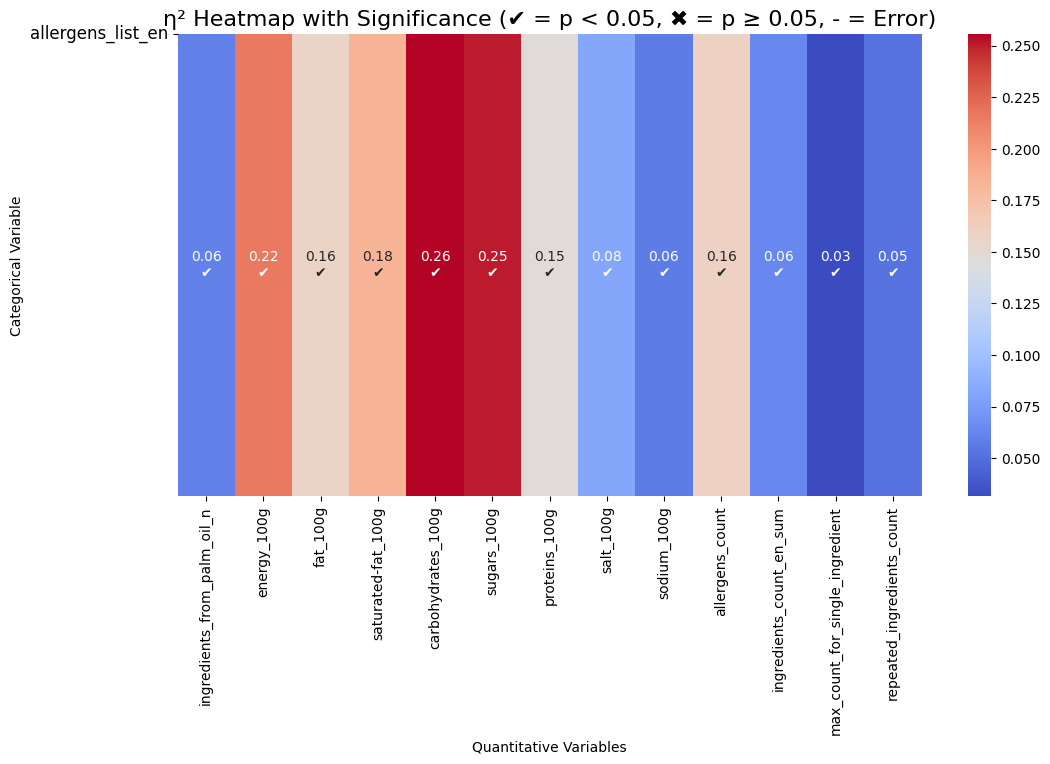

In [155]:
ANOVA_variables = np.concatenate((bivariate_analysis_parameters[bivariate_analysis_parameters['test_type']=="ANOVA_2"]['variable1_name'].values,['allergens_list_en']))
eta_squared_with_p_heatmap(df_refined[ANOVA_variables], dependent_var='allergens_list_en')

In [156]:
ANOVA_variables

array(['ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'allergens_count',
       'ingredients_count_en_sum', 'max_count_for_single_ingredient',
       'repeated_ingredients_count', 'allergens_list_en'], dtype=object)

In [157]:
ANOVA_variables

array(['ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'allergens_count',
       'ingredients_count_en_sum', 'max_count_for_single_ingredient',
       'repeated_ingredients_count', 'allergens_list_en'], dtype=object)

In [158]:
from data_analysis_functions import cramers_v_heatmap

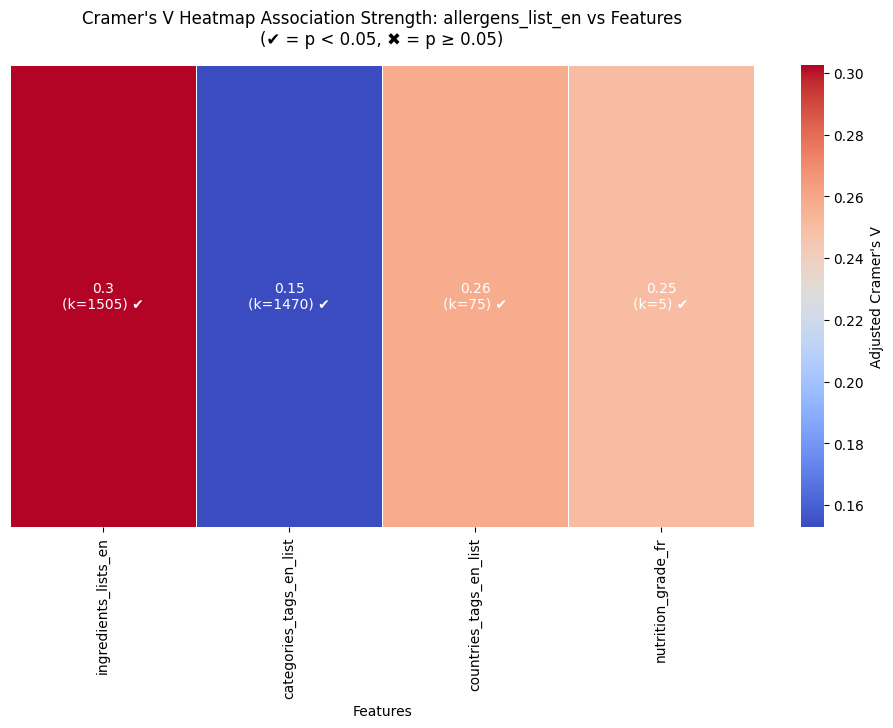

In [159]:
khi2_variables = np.concatenate((bivariate_analysis_parameters[bivariate_analysis_parameters['test_type']=="Khi2"]['variable1_name'].values,['allergens_list_en']))
cramers_v_heatmap(df_refined[khi2_variables], dependent_var='allergens_list_en')

## 5) Save refined dataframe

In [160]:
# save df_refined as csv
df_refined.to_csv('df_refined_allergens_based.csv', index=False)
